# Fastcampus Data EDA

## 문제정의

온라인 강의 기획 종류별(format) 매출액 분석 및 매출 향상 방향성 제시

## 데이터 수집

### 데이터 설명

| 변수 | 설명 |
| ---- | ---- |
| id | 해당 거래내역에 대한 ID(PK) |
| customer_id | 결제한 고객 ID |
| course_id | 강의 ID, 프로모션에 대해서는 값이 할당되어 있지 않습니다. |
| type | 거래의 종류 |
| state | 거래에 대한 상태 |
| course_title | 강의 제목 |
| category_title | 대분류 |
| format | 온라인 강의의 기획 종류 |
| completed_at	 | state가 COMPLETED로 변경된 시점 |
| transaction_amount | 최종 결제 금액 |
| coupon_title | 쿠폰 종류 |
| coupon_discount_amount | 쿠폰 할인 금액 |
| sale_price | 판매 금액 |
| tax_free_amount | 세금 공제 금액(보안상 공유가 힘듦: 컬럼 제거) |
| pg | PG사 종류 |
| method | 결제 방식 |
| subcategory_title | 중분류 |
| marketing_start_at | 강의 판매 시점 (자세한 사항은 공유가 힘듦) |

### 데이터 불러오기

In [1]:
# 필요 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 구글 드라이브 파일 엑세스
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 코랩
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# 런타임 재시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,381 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [3]:
# matplotlib의 폰트를 Nanum 폰트
plt.rc('font', family='NanumBarunGothic') 

In [4]:
# 한글
# plt.rc("font", family = "Malgun Gothic")
# sns.set(font="Malgun Gothic", 
# rc={"axes.unicode_minus":False}, style='darkgrid')

In [5]:
# 데이터 로딩 및 확인
# data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/미니_프로젝트-데이터_분석/데이터분석프로젝트_VER2_210329_210926.csv", encoding='cp949')
# data.head()

In [6]:
# 데이터 로딩 및 확인
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/미니_프로젝트-데이터_분석/데이터분석프로젝트_VER2_210329_210926.xlsx")
data.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [8]:
# data 사본 df
df = data.copy()
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


### 데이터 타입과 결측치 확인하기

In [9]:
# shape
df.shape

(105419, 18)

In [10]:
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [11]:
# 결측치
df.isna().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

## 데이터 탐색

### 불필요한 값 제거 및 전처리

| type | 유형 |
| ---- | ---- | 
| ORDER | DEPRECATED |
| PAYMENT | 결제 |
| TRANSACTION | B2B계약결제(무시해도 좋음) |
| REFUND | 환불 |

| state | 상태 | 
| ---- | ---- |
| COMPLETED | 결제 완료 |
| REQUESTED | 고객에게 결제 요청 |
| PENDING | 보안 이슈로 공개 X |
| CANCELLED | 보안 이슈로 공개 X |
| HIDDEN | 보안 이슈로 공개 X |
| DELETED | 보안 이슈로 공개 X | 

In [12]:
# 'tax_free_amount' column 삭제
df = df.drop('tax_free_amount', axis = 1)

# 'format'에서 결측치 제거
df['format'] = df['format'].fillna('프로모션')
df = df.drop(df[df['format']=='프로모션'].index)

# 'type'에서 결측치 처리 및 type_drop_list인 row 제거
type_drop_list = ['ORDER', 'TRANSACTION']
for name in type_drop_list:
    df = df.drop(df[df['type']==name].index)

# 'state'에서 state_drop_list인 row 제거
state_drop_list = ['PENDING', 'CANCELLED', 'DELETED', 'REQUESTED']
for name in state_drop_list:
    df = df.drop(df[df['state']==name].index)

# 'pg'의 NaN 값들을 'PG'로 대체
df['pg'] = df['pg'].fillna('PG')

# index reset
df = df.reset_index()

# 이전 index column drop
df = df.drop('index', axis = 1)

In [13]:
df.columns

Index(['id', 'customer_id', 'course_id', 'type', 'state', 'course_title',
       'category_title', 'format', 'completed_at', 'transaction_amount',
       'coupon_title', 'coupon_discount_amount', 'sale_price', 'pg', 'method',
       'subcategory_title', 'marketing_start_at'],
      dtype='object')

transaction_amount가 0인 값 drop

In [14]:
# transaction_amount이 0인 값들의 method를 출력 -> PROMOTION만 나옴
df[df['transaction_amount'] == 0]['method'].unique()

array(['PROMOTION'], dtype=object)

In [15]:
# method가 PROMOTION인 값들의 transaction_amount를 출력 -> 0만 나옴
df[df['method'] == 'PROMOTION']['transaction_amount'].unique()

array([0])

In [16]:
# method가 promotion이면서 transaction_amount가 0원인 것들
df[(df['method'] == 'PROMOTION') & (df['transaction_amount'] == 0)]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
133,971612,14030.0,203525.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,프로그래밍,올인원,2021-03-28 22:26:58,0,한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰 (-2...,110500.0,110500.0,PG,PROMOTION,백엔드 개발,2021-02-01
192,972001,458172.0,201478.0,PAYMENT,COMPLETED,올인원 패키지 : TypeScript & Angular 실전,프로그래밍,올인원,2021-03-29 00:14:32,0,수강생 50만명 돌파 기념 감사제 쿠폰,111000.0,101000.0,PG,PROMOTION,프론트엔드 개발,NaT
200,972056,464239.0,201435.0,PAYMENT,COMPLETED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-29 00:55:02,0,수강생 50만명 돌파 기념 감사제 쿠폰,117500.0,110500.0,PG,PROMOTION,개발자 커리어,NaT
209,972116,440315.0,201518.0,PAYMENT,COMPLETED,합격 패스 : 정보처리기사 필기&실기,프로그래밍,올인원,2021-03-29 01:51:17,0,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,9900.0,PG,PROMOTION,개발자 커리어,NaT
211,972122,440315.0,201435.0,PAYMENT,COMPLETED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-29 01:56:59,0,수강생 50만명 돌파 기념 감사제 쿠폰,115500.0,110500.0,PG,PROMOTION,개발자 커리어,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56549,1363763,23638.0,206742.0,PAYMENT,COMPLETED,올인원 패키지 : 클라우드를 활용한 데이터 파이프라인 구축,데이터사이언스,올인원,2021-09-24 15:10:10,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,409000.0,409000.0,PG,PROMOTION,데이터엔지니어링,2021-09-13
56565,1363886,377623.0,206257.0,PAYMENT,COMPLETED,초격차 패키지 : 게임 개발자 취업의 모든 것,프로그래밍,올인원,2021-09-24 15:58:22,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,269000.0,269000.0,PG,PROMOTION,게임,2021-08-09
56615,1364276,455280.0,203529.0,PAYMENT,COMPLETED,올인원 패키지 : 6개월 치 업무를 하루 만에 끝내는 업무자동화,업무 생산성,올인원,2021-09-24 17:58:18,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,159000.0,159000.0,PG,PROMOTION,업무자동화,2020-11-25
56626,1364341,475055.0,205579.0,PAYMENT,COMPLETED,올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략,투자/재테크,올인원,2021-09-24 18:56:08,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,329000.0,329000.0,PG,PROMOTION,주식 투자,2021-07-13


In [17]:
# 'transaction_amount'==0 인 데이터 삭제
cond = df[df['transaction_amount']==0].index
df = df.drop(cond)

pg, method columns -> payment_data column 병합

In [18]:
# pg 컬럼 nan 값 PG값으로 대체
df['pg'] = df['pg'].fillna('PG')

In [19]:
# pg 컬럼 값 확인
df['pg'].unique()

array(['PG', 'INICIS', 'KAKAO', 'CHAI', 'PAYCO', 'NAVER'], dtype=object)

In [20]:
# method nan 값 공백으로 대체
df['method'] = df['method'].fillna('')

In [21]:
# method 컬럼 값 확인
df['method'].unique()

array(['CARD', 'VBANK', 'TRANS', 'TRANSFER', 'ONSITE', 'POINT', 'VOUCHER'],
      dtype=object)

In [22]:
# payment_data 컬럼 생성
df['payment_data'] = df['pg'] +' '+ df['method']

In [23]:
# pg, method 컬럼 삭제
df = df.drop(['pg', 'method'], axis=1)

In [24]:
# payment_data 컬럼 값 확인
df['payment_data'].unique()

array(['PG CARD', 'PG VBANK', 'PG TRANS', 'PG TRANSFER', 'PG ONSITE',
       'INICIS CARD', 'INICIS VBANK', 'INICIS TRANS', 'KAKAO CARD',
       'CHAI TRANS', 'KAKAO POINT', 'PAYCO CARD', 'PAYCO POINT',
       'PAYCO VBANK', 'NAVER CARD', 'NAVER TRANS', 'PG VOUCHER',
       'NAVER POINT'], dtype=object)

In [25]:
# payment_data nan값 검색
df['payment_data'].isna().sum()

0

### 구매관련 정보들 분석

최대 금액 구매 고객

In [26]:
df.loc[df['transaction_amount'] == df['transaction_amount'].max()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
10594,1039468,512983.0,204638.0,PAYMENT,COMPLETED,(B2B) 서울형 청년인턴 디지털 마케팅 및 영업 과정 (국내),마케팅,B2B,2021-04-29 15:51:40,113400000,NaN,NaN,NaN,NaN,NaT,PG TRANSFER


단일품목 가장 상품 구매 고객

In [27]:
df.loc[df['sale_price'] == df['sale_price'].max()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
39468,1252478,116416.0,203992.0,PAYMENT,COMPLETED,(B2B) 하나금융티아이 DT University(2021),크리에이티브,B2B,2021-07-30 15:10:39,44600000,NaN,NaN,44600000.0,NaN,NaT,INICIS CARD


단편적으로 최대 구매 고객과 단일 최고 금액 고객은 모두 format이 B2B인 것을 확인 가능하다.

'subcategory_title' 별 구매 횟수

In [28]:
df['subcategory_title'].value_counts()

영상 편집        3655
개발자 커리어      2906
백엔드 개발       2895
프론트엔드 개발     2890
딥러닝/인공지능     2334
데이터분석        2083
PPT/보고서      2073
엑셀/VBA       1951
디자인툴         1915
모바일앱         1862
글쓰기/카피라이팅    1766
일러스트         1624
UX/UI        1357
DevOps       1206
주식 투자        1112
금융/투자 실무     1111
데이터마케팅       1104
머신러닝         1033
회계/재무/세무      981
모션그래픽         973
시각디자인         947
게임            849
디지털마케팅        848
SNS마케팅        605
부동산 개발        593
업무자동화         485
코딩 입문         400
VFX           367
부동산 투자        352
리더십           266
게임 그래픽        233
데이터엔지니어링      188
커뮤니케이션        121
Name: subcategory_title, dtype: int64

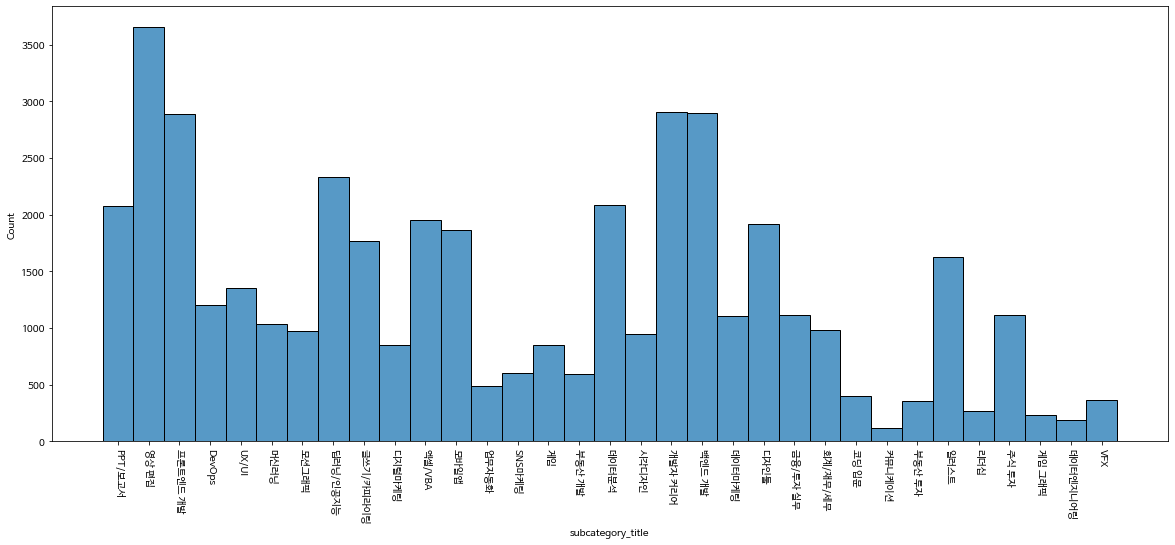

In [29]:
plt.figure(figsize=(20,8))
sns.histplot(data= df,  x='subcategory_title', )
plt.xticks(rotation=-90, fontsize=10)
plt.show()

subcategory_title별 거래 순위는 '영상 편집', '개발자 커리어', '백엔드 개발', '프론트엔드 개발', '딥러닝/인공지능' ... 순서임을 확인할 수 있다.

강의 개설의 시간적 추의

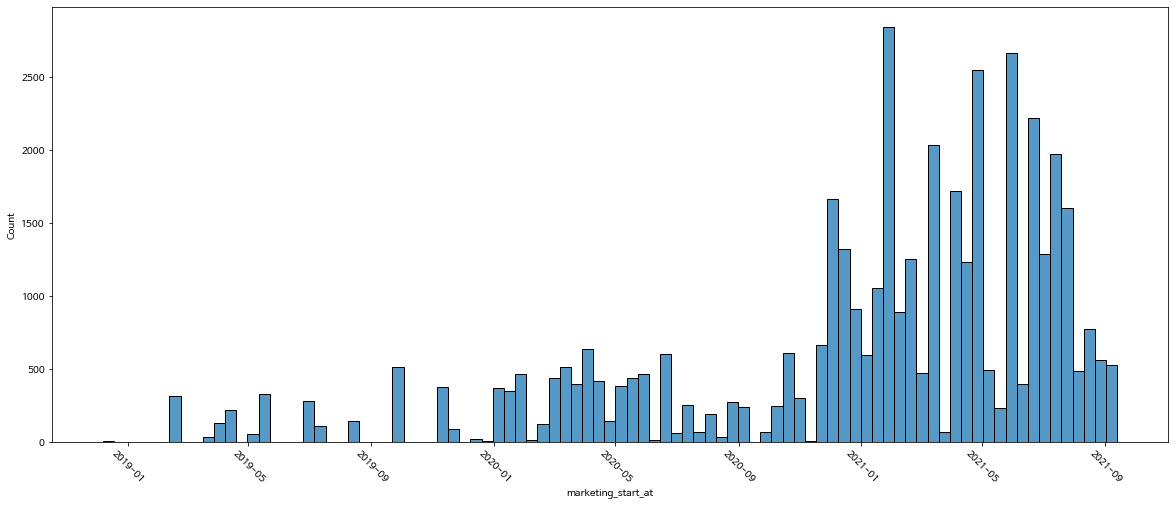

In [30]:
plt.figure(figsize=(20,8))
sns.histplot(data= df,  x='marketing_start_at')
plt.xticks(rotation=-45, fontsize=10)
plt.show()

상관계수로 분석

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


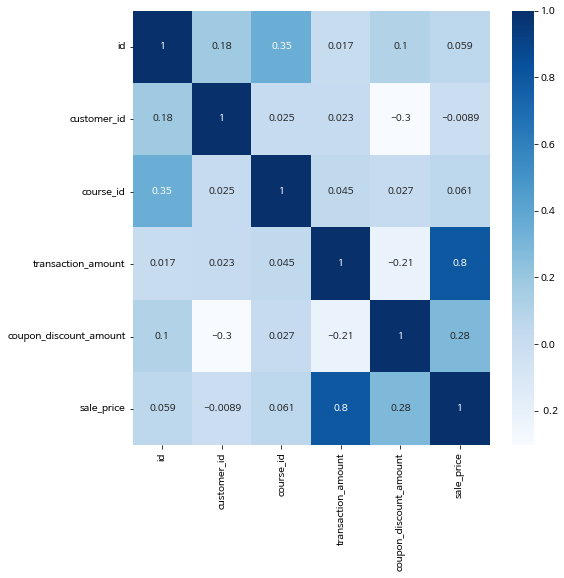

In [31]:
corr = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(data = corr, cmap='Blues', annot=True)
plt.show()

쿠폰과 판매 수익과의 음의 상관관계 파악 가능

### format별 세부 내용 분석

format 안 'category_title'별 고객수, 수익

In [234]:
df['format'].value_counts()

올인원        43205
RED         3277
온라인 완주반     1659
하루10분컷      1359
B2B 온라인      980
B2B          485
B2G          396
스쿨 온라인       369
스쿨            89
이벤트           89
아카이브          35
캠프            23
MBA           22
관리             1
온라인            1
Name: format, dtype: int64

In [32]:
how = {
    'customer_id' : np.count_nonzero,
    'transaction_amount' : np.sum
}

df.groupby(['format','category_title']).agg(how)

customer_id  transaction_amount
format  category_title                                 
B2B     교육                        6            24347500
        데이터사이언스                  25           475971780
        마케팅                       3           124222500
        업무 생산성                    5            22025500
        크리에이티브                    6            59413500
        프로그래밍                   440            46747010
B2B 온라인 교육                      922          1135978045
        데이터사이언스                  15            65907774
        마케팅                       6             2760000
        부동산/금융                    5             2177500
        비즈니스                      1              360000
        업무 생산성                    1              480000
        크리에이티브                    9             3660000
        파이낸스                      1              480000
        프로그래밍                    20            16965000
B2G     마케팅                       1            20000000
        프로그래밍                   395             8921300
MBA     지식콘텐츠                    22             4970000
RED     데이터사이언스                 313            69105400
        마케팅                    1522           186580408
        업무 생산성                  104            17685000
        영상/3D                   276            44848400
        프로그래밍                  1062           163213155
관리      관리                        1              150000
스쿨      데이터사이언스                  79            14608693
        크리에이티브                    5            -2890833
        프로그래밍                     5           -13003206
스쿨 온라인  프로그래밍                   369            38529132
아카이브    크리에이티브                   35             1895700
온라인 완주반 데이터 사이언스                  5             1550000
        데이터사이언스                 362           105298520
        마케팅                     227            65202769
        비즈니스                      1              314000
        업무 생산성                  185            34225900
        크리에이티브                  339            77395418
        프로그래밍                   540           132878253
올인원     데이터사이언스                6149           771325932
        디자인                    5852           663198168
        마케팅                    3047           335400147
        부동산/금융                 2812           471823434
        비즈니스                     18             4620000
        업무 생산성                 5003           493982584
        영상/3D                  4955           499857805
        크리에이티브                  542           160690042
        투자/재테크                 1464           277706420
        파이낸스                     18             4620000
        프로그래밍                 13343          1313858001
이벤트     데이터사이언스                  19              814000
        마케팅                       7              440000
        부동산/금융                    4              242000
        크리에이티브                   18              892000
        프로그래밍                    41             2010000
캠프      데이터사이언스                  18            16320000
        부동산/금융                    4             1401500
        프로그래밍                     1             1350000
하루10분컷  비즈니스                      4               95865
        업무 생산성                 1355            26630441

format별 결제 금액과 환불 금액

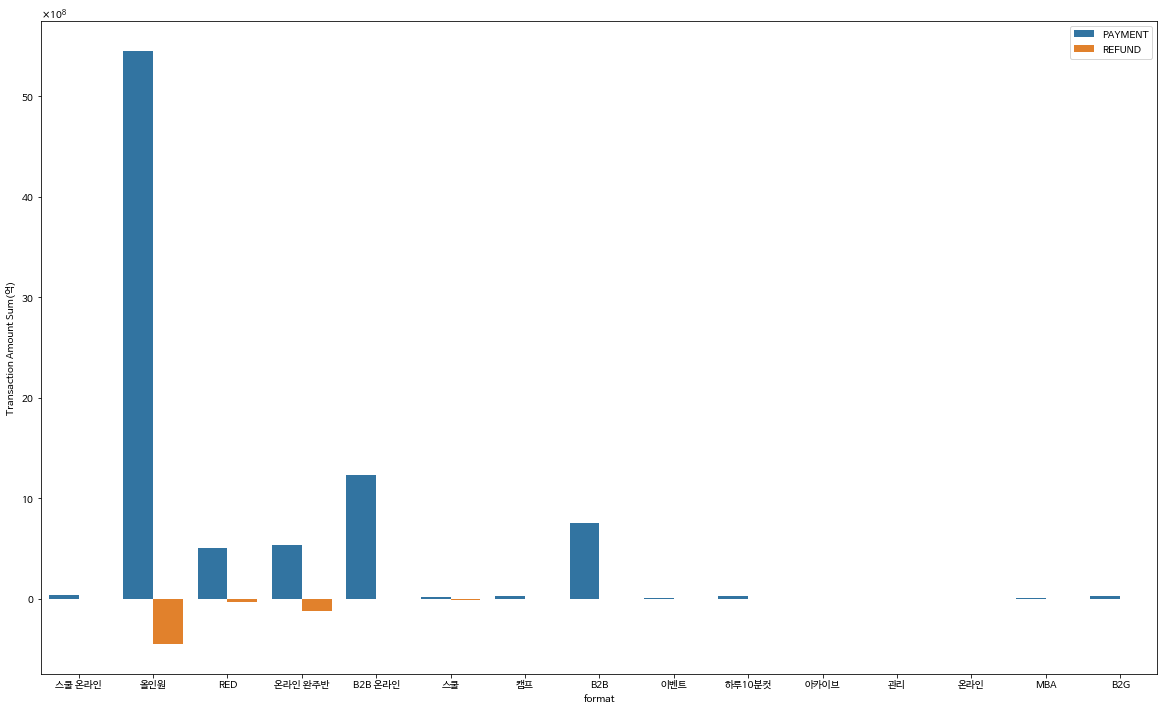

In [33]:
plt.figure(figsize=(20, 12))
sns.barplot(data=df, y='transaction_amount', x='format', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')
plt.show()

format별 순수익은 '올인원', 'B2B 온라인', 'B2B', 'RED', '온라인 완주반' ... 순서임을 확인할 수 있다.

format별 고객수, 수익 Bar Chart

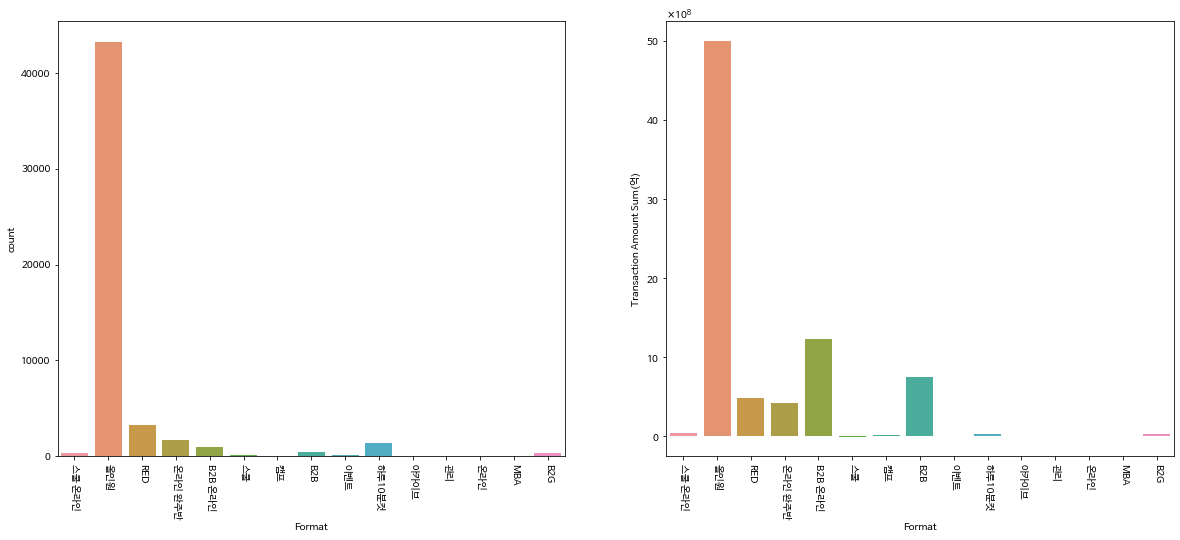

In [34]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='format')
plt.xticks(rotation=-90)
plt.xlabel('Format')


plt.subplot(1, 2, 2)
sns.barplot(data=df, x='format', y='transaction_amount',  ci=None, estimator=np.sum)
plt.xticks(rotation=-90)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.xlabel('Format')
plt.ylabel('Transaction Amount Sum(억)')

plt.show()

format별 거래 횟수는 '올인원', 'RED', '온라인 완주반', '하루10분컷', 'B2B 온라인' ... 순서임을 확인할 수 있다.

format 환불률 계산

In [35]:
# 환불이 승인된 데이터프레임
cond_refund = (df['type']== 'REFUND') & (df['state'] == 'COMPLETED')

# 결제가 승인된 데이터 프레임
cond_payment = (df['type']== 'PAYMENT') & (df['state'] == 'COMPLETED')

# format별 환불 비율
format_refund_rate = []

# format array화
format_array = df['format'].unique()

for i in format_array:
    cond = (df['format'] == i)
    
    # 결제승인 == df[cond][cond_payment]
    # 환불승인 == df[cond][cond_refund]
    
    # 결제승인 갯수 = 전체 갯수
    payment = len(df[cond][cond_payment].index)
    # 환불승인 갯수
    refund = len(df[cond][cond_refund].index)

    # 환불률 계산
    if refund != 0 and payment != 0:
        refund_ratio = refund / payment * 100
    elif payment == 0:
        refund_ratio = 0
    refund_ratio = round(refund_ratio, 3)
    
    format_refund_rate.append(refund_ratio)
format_refund_rate = np.array(format_refund_rate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


format별 결제 금액과 환불 금액, 환불률과 금액별 환불률

In [36]:
# PAYMENT 금액 가져오기
temp_df = df
how = {
    'transaction_amount' : np.sum
}

cond = temp_df[temp_df['type']=='REFUND'].index
temp_df = temp_df.drop(cond)

payment_list = []

completed_only = temp_df.groupby(['format','type','state']).agg(how)
for i in range(len(completed_only)):
    payment_list.append(completed_only.iloc[i,0])
payment_list.insert(9,0)

# REFUND 금액 가져오기
temp_df = df

cond = temp_df[temp_df['type']=='PAYMENT'].index
temp_df = temp_df.drop(cond)

temp_df.groupby(['format','type','state']).agg(how)
refund_list = []

temp_df.groupby(['format','type','state']).agg(how)
for i in range(13):
    refund_list.append(temp_df.groupby(['format','type','state']).agg(how).iloc[i,0])
refund_list.insert(3,0)
refund_list.insert(5,0)

# 그래프용 데이터 temp_df
temp_df = pd.DataFrame(
    data = {'PAYMENT' : payment_list, 
            'REFUND' : refund_list},
    index = np.sort(df['format'].unique(), axis=0),
    columns=['PAYMENT','REFUND']
)
temp_df['transaction_amount_refund_rate'] = round((abs(temp_df['REFUND']) / (temp_df['PAYMENT'] ) *100), 2)
temp_df['format_refund_rate'] = np.round(format_refund_rate, 2)

temp_df

,PAYMENT,REFUND,transaction_amount_refund_rate,format_refund_rate
B2B,755932780,-3204990,0.42,12.50
B2B 온라인,1232648319,-3880000,0.31,7.60
B2G,31846300,-2925000,9.18,5.40
MBA,4970000,0,0.00,22.80
RED,509463500,-28031137,5.50,0.72
관리,150000,0,0.00,12.66
스쿨,14608693,-15894039,108.80,21.05
스쿨 온라인,42034660,-3505528,8.34,22.48
아카이브,2181900,-286200,13.12,8.54
온라인,0,-199000,inf,2.41


format별 환불률과 금액별 환불률 Bar Chart 비교

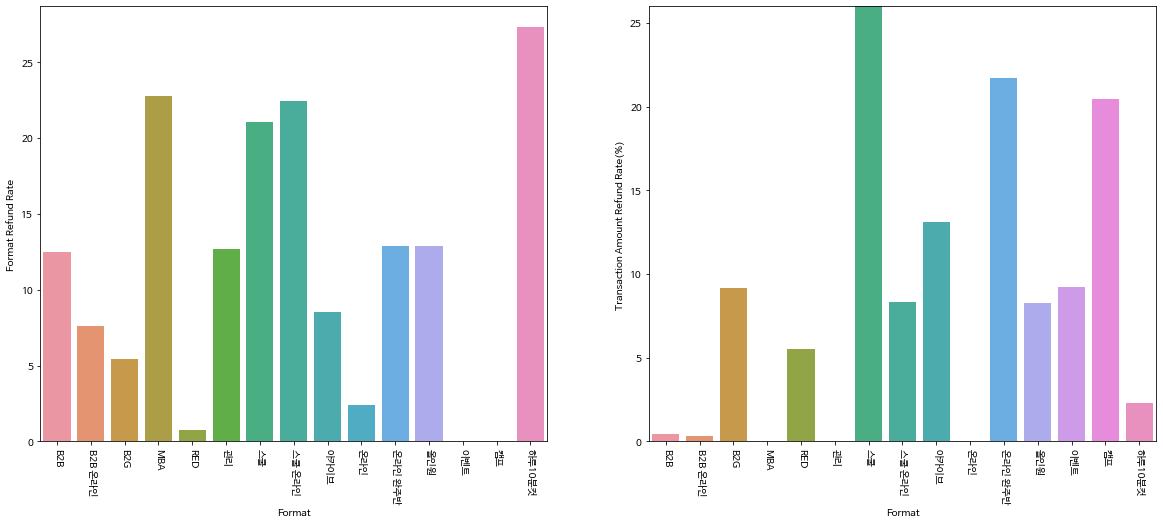

In [37]:
# df5 필요한 항목들을 -> array로 변환
format_array = np.array(temp_df.index)
format_refund_rate = np.array(temp_df['format_refund_rate'])
transaction_amount_refund_rate = np.array(temp_df['transaction_amount_refund_rate'])

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.barplot( x=format_array, y=format_refund_rate ,)
plt.xticks(rotation=-90)
plt.ylabel('Format Refund Rate')
plt.xlabel('Format')

plt.subplot(1, 2, 2)
sns.barplot(x=format_array, y=transaction_amount_refund_rate,  ci=None, estimator=np.sum)
plt.xticks(rotation=-90)
plt.xlabel('Format')
plt.ylabel('Transaction Amount Refund Rate(%)')
plt.ylim(0, 26)
plt.show()

환불률 그래프를 통해 format별 환불률을 확인할 수 있다.

format별 환불률과 금액별 환불률 Chart 비교

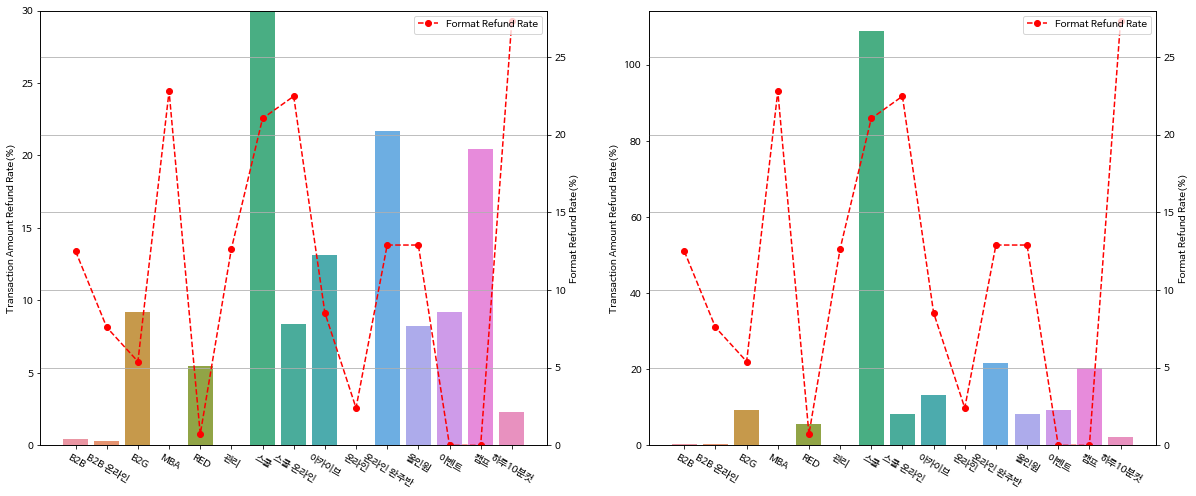

In [38]:
# df5 필요한 항목들을 -> array로 변환
format_array = np.array(temp_df.index)
format_refund_rate = np.array(temp_df['format_refund_rate'])
transaction_amount_refund_rate = np.array(temp_df['transaction_amount_refund_rate'])

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
lns1 = sns.barplot(x=format_array, y=transaction_amount_refund_rate )
lns1.set_ylim(0, 30)
lns1.set_ylabel('Transaction Amount Refund Rate(%)')
plt.xticks(rotation=-30)

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = lns1.twinx()
lns2 = ax2.plot(format_array, format_refund_rate, color = 'red', label='Format Refund Rate',linestyle='--', marker='o')
ax2.set_ylabel('Format Refund Rate(%)')
ax2.grid()
ax2.legend(loc='upper right')
ax2.set_ylim(0, 28)

plt.subplot(1, 2, 2)
lns1 = sns.barplot(x=format_array, y=transaction_amount_refund_rate )

lns1.set_ylabel('Transaction Amount Refund Rate(%)')
plt.xticks(rotation=-30)

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = lns1.twinx()
lns2 = ax2.plot(format_array, format_refund_rate, color = 'red', label='Format Refund Rate',linestyle='--', marker='o')
ax2.set_ylabel('Format Refund Rate(%)')
ax2.grid()
ax2.legend(loc='upper right')
ax2.set_ylim(0, 28)
plt.show()

format별 금액과 환불률 Chart 비교

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


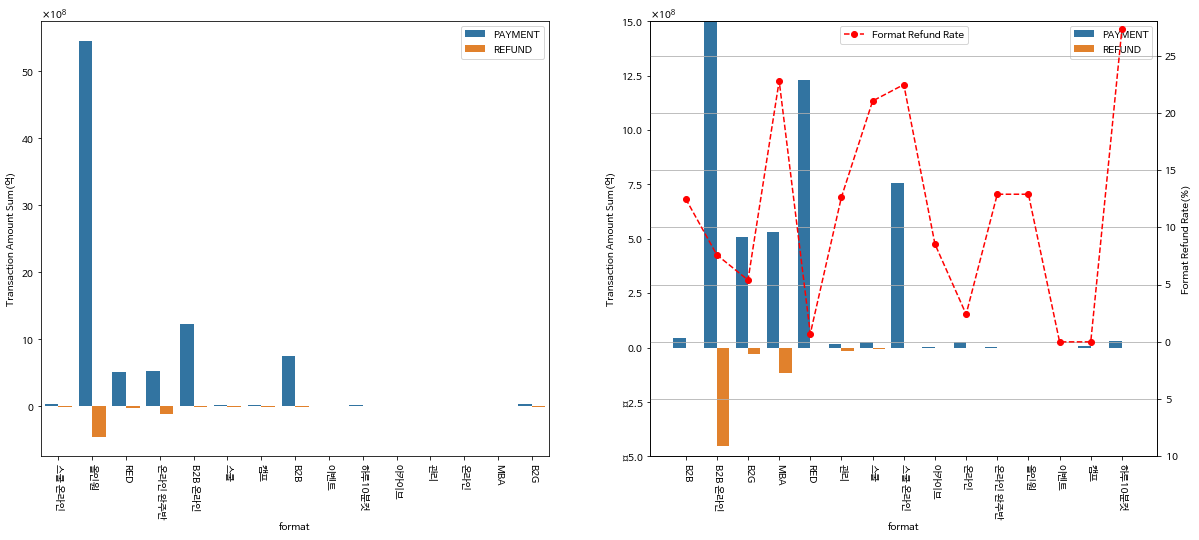

In [41]:
# df5 필요한 항목들을 -> array로 변환
format_array = np.array(temp_df.index)
format_refund_rate = np.array(temp_df['format_refund_rate'])
transaction_amount_refund_rate = np.array(temp_df['transaction_amount_refund_rate'])

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y='transaction_amount', x='format', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')
plt.xticks(rotation=-90)

plt.subplot(1, 2, 2)
lns1 = sns.barplot(data=df, y='transaction_amount', x='format', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylim(-500000000, 1500000000)
lns1.set_ylabel('Transaction Amount Sum(억)')
plt.xticks(rotation=-90)

ax2 = lns1.twinx()
lns2 = ax2.plot(format_array, format_refund_rate, color = 'red', label='Format Refund Rate',linestyle='--', marker='o')
ax2.set_ylabel('Format Refund Rate(%)')
ax2.grid()
ax2.legend(loc='upper center')
ax2.set_ylim(-10, 28)
plt.show()

### format('스쿨 온라인', '캠프', '스쿨', '이벤트', '하루10분컷', '아카이브', '관리', '온라인', '프로모션', 'MBA', 'B2G') 분석

In [42]:
# '스쿨 온라인', '캠프', '스쿨', '이벤트', '하루10분컷', '아카이브', '관리', '온라인', 'MBA', 'B2G'
con = (df['format']=='스쿨 온라인')|(df['format']=='캠프')|(df['format']=='스쿨')|(df['format']=='이벤트')|(df['format']=='하루10분컷')|(df['format']=='아카이브')|(df['format']=='관리')|(df['format']=='온라인')|(df['format']=='MBA')|(df['format']=='B2G')
df_union = df.copy()
df_union = df_union[con]

In [43]:
df_union.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
0,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,2021-03-04,PG CARD
73,971265,175430.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 20:39:29,190900,NaN,NaN,190900.0,NaN,2021-03-04,PG CARD
110,971482,473334.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 21:40:24,190900,NaN,NaN,190900.0,NaN,2021-03-04,PG CARD
117,971527,478402.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 21:57:31,190900,NaN,NaN,190900.0,NaN,2021-03-04,PG CARD
119,971536,271507.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 21:59:54,171810,[10% 할인] 프론트엔드 실무 완성편,19090.0,190900.0,NaN,2021-03-04,PG CARD


In [229]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2384 entries, 0 to 56715
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      2384 non-null   int64         
 1   customer_id             2384 non-null   float64       
 2   course_id               2383 non-null   float64       
 3   type                    2384 non-null   object        
 4   state                   2384 non-null   object        
 5   course_title            2384 non-null   object        
 6   category_title          2383 non-null   object        
 7   format                  2384 non-null   object        
 8   completed_at            2384 non-null   datetime64[ns]
 9   transaction_amount      2384 non-null   int64         
 10  coupon_title            190 non-null    object        
 11  coupon_discount_amount  190 non-null    float64       
 12  sale_price              2304 non-null   float64

In [44]:
df_union['format'].value_counts()

하루10분컷    1359
B2G        396
스쿨 온라인     369
스쿨          89
이벤트         89
아카이브        35
캠프          23
MBA         22
관리           1
온라인          1
Name: format, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


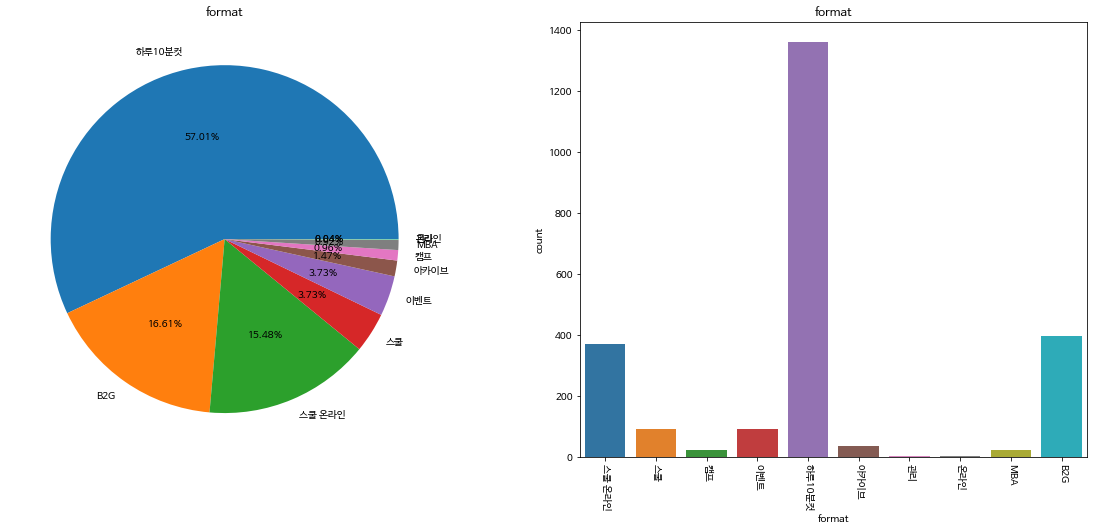

In [249]:
fig = plt.figure(figsize=(20,8))
graph1 = fig.add_subplot(1,2,1)
df_union['format'].value_counts().plot.pie(autopct='%1.2f%%',ax=graph1)
graph1.set_title('format')
graph1.set_ylabel('')
graph2 = fig.add_subplot(1,2,2)
sns.countplot('format',data=df_union,ax=graph2)
graph2.set_title('format')
plt.xticks(rotation=-90)
plt.show()

format 별 거래 횟수 순위는 '하루10분컷', 'B2G', '스쿨 온라인' ...순으로 높은 것을 확인할 수 있다. 

In [46]:
df_union['category_title'].value_counts()

업무 생산성     1355
프로그래밍       811
데이터사이언스     116
크리에이티브       58
지식콘텐츠        22
부동산/금융        8
마케팅           8
비즈니스          4
관리            1
Name: category_title, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


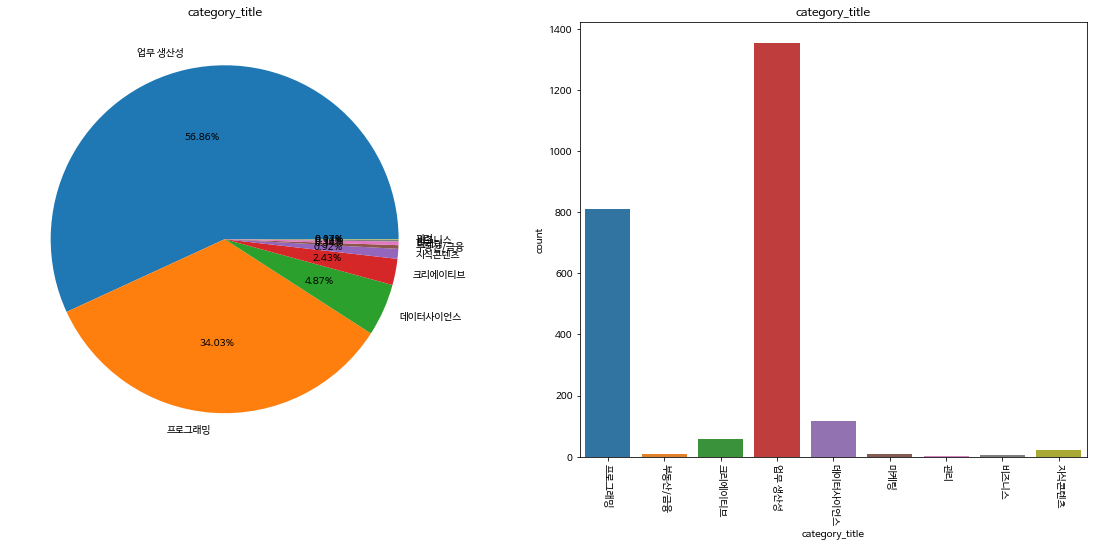

In [248]:
fig = plt.figure(figsize=(20,8))
graph1 = fig.add_subplot(1,2,1)
df_union['category_title'].value_counts().plot.pie(autopct='%1.2f%%',ax=graph1)
graph1.set_title('category_title')
graph1.set_ylabel('')
graph2 = fig.add_subplot(1,2,2)
sns.countplot('category_title',data=df_union,ax=graph2)
graph2.set_title('category_title')
plt.xticks(rotation=-90)
plt.show()

category_title 별 거래 횟수 순위는 '업무 생산성', '프로그래밍', '데이터사이언스' ... 순임을 확인할 수 있다.

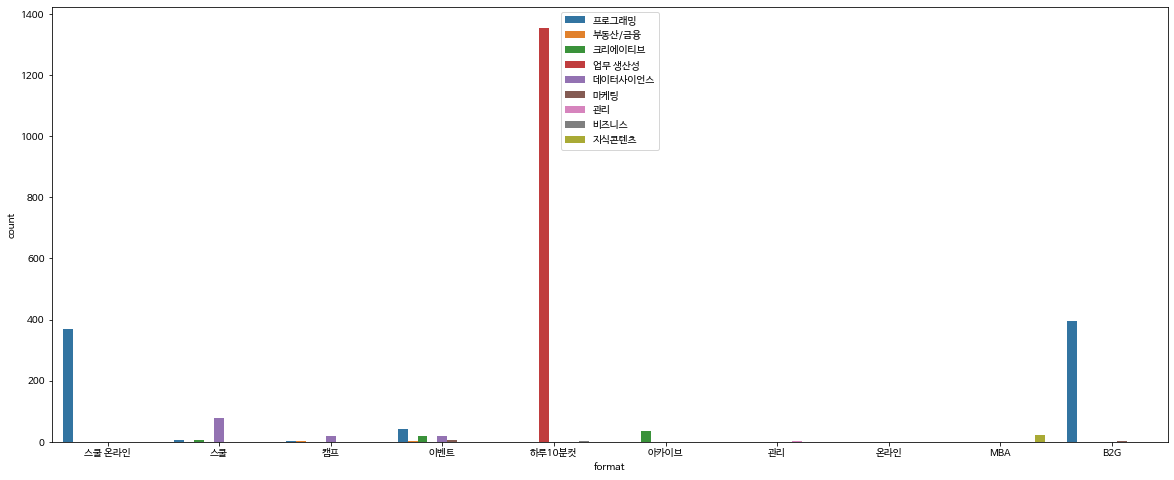

In [48]:
plt.figure(figsize=(20,8))
sns.countplot(data= df_union, hue='category_title', x='format')
plt.xticks(rotation=0, fontsize=10)
plt.legend(loc='best')
plt.show()

format별 category_title의 거래 횟수 순위를 확인할 수 있다.

In [49]:
df_union['transaction_amount'].value_counts()

 19900      321
 19500      274
 20300      251
 24900      164
 30000      141
           ... 
-79000        1
 17550        1
 150000       1
-437500       1
 1350000      1
Name: transaction_amount, Length: 167, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


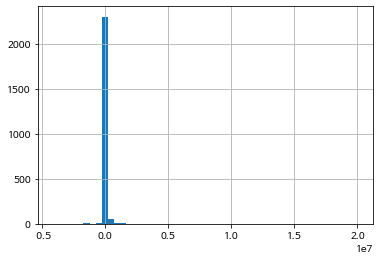

In [ ]:
df_union['transaction_amount'].hist(bins=50)

In [ ]:
df_union['transaction_amount'].min()

-4144074

In [ ]:
df_union[df_union['transaction_amount']==df_union['transaction_amount'].min()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
2593,985601,140373.0,203632.0,REFUND,COMPLETED,풀스택 개발 취업 완성 스쿨 14기,프로그래밍,스쿨,2021-04-01 16:55:34,-4144074,NaN,NaN,6700000.0,NaN,NaT,PG CARD


In [ ]:
df_union['transaction_amount'].max()

20000000

In [ ]:
df_union[df_union['transaction_amount']==df_union['transaction_amount'].max()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
44149,1284700,572231.0,205574.0,PAYMENT,COMPLETED,(B2B) 임팩트캠퍼스 디지털 마케팅 프로젝트십,마케팅,B2G,2021-08-13 17:10:07,20000000,NaN,NaN,NaN,NaN,NaT,PG TRANSFER


In [ ]:
how = {
    'id' : np.size,
    'transaction_amount' : np.sum,
}
df_union.groupby(['format','category_title', 'type']).agg(how)

id  transaction_amount
format category_title type                             
B2G    마케팅            PAYMENT     1            20000000
       프로그래밍          PAYMENT   310            11846300
                      REFUND     85            -2925000
MBA    지식콘텐츠          PAYMENT    22             4970000
관리     관리             PAYMENT     1              150000
스쿨     데이터사이언스        PAYMENT    79            14608693
       크리에이티브         REFUND      5            -2890833
       프로그래밍          REFUND      5           -13003206
스쿨 온라인 프로그래밍          PAYMENT   328            42034660
                      REFUND     41            -3505528
아카이브   크리에이티브         PAYMENT    31             2181900
                      REFUND      4             -286200
이벤트    데이터사이언스        PAYMENT    16             1001000
                      REFUND      3             -187000
       마케팅            PAYMENT     7              440000
       부동산/금융         PAYMENT     4              242000
       크리에이티브         PAYMENT    16             1046000
                      REFUND      2             -154000
       프로그래밍          PAYMENT    39             2115000
                      REFUND      2             -105000
캠프     데이터사이언스        PAYMENT    15            20820000
                      REFUND      3            -4500000
       부동산/금융         PAYMENT     3             1804000
                      REFUND      1             -402500
       프로그래밍          PAYMENT     1             1350000
하루10분컷 비즈니스           PAYMENT     4               95865
       업무 생산성         PAYMENT  1323            27255885
                      REFUND     32             -625444

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


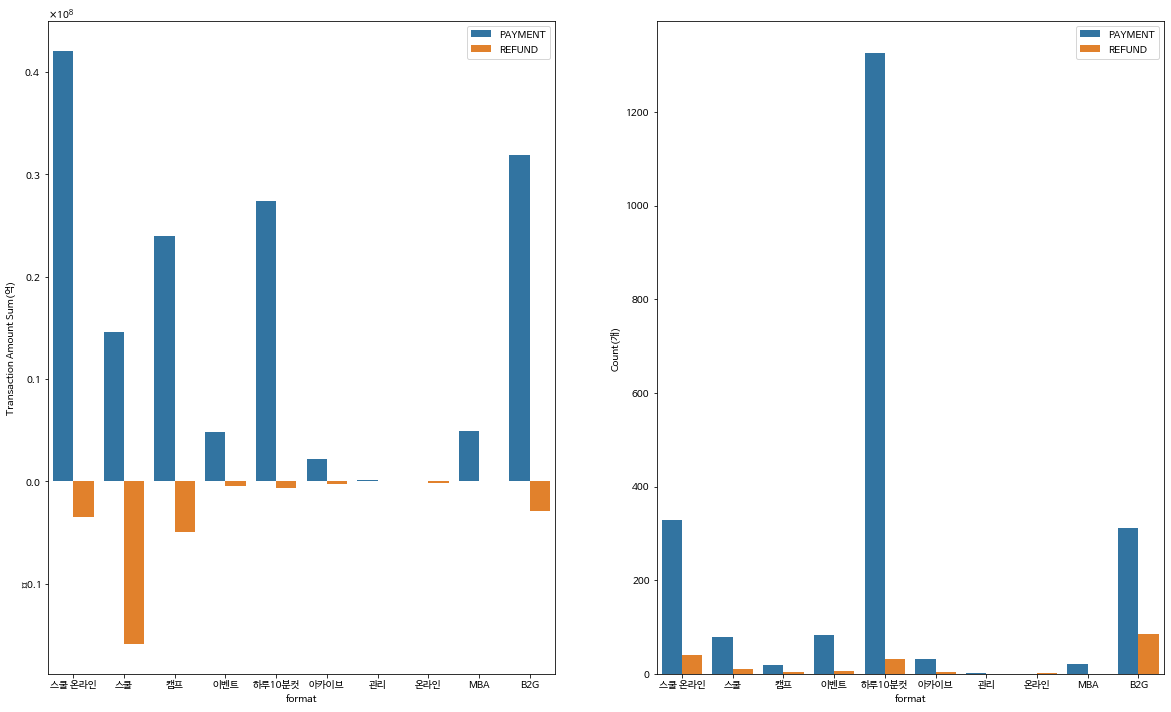

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=df_union, y='transaction_amount', x='format', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=df_union, y='id', x='format', hue='type',  ci=None, estimator=np.size)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

format별 수익과 거래 횟수를 확인할 수 있다.

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


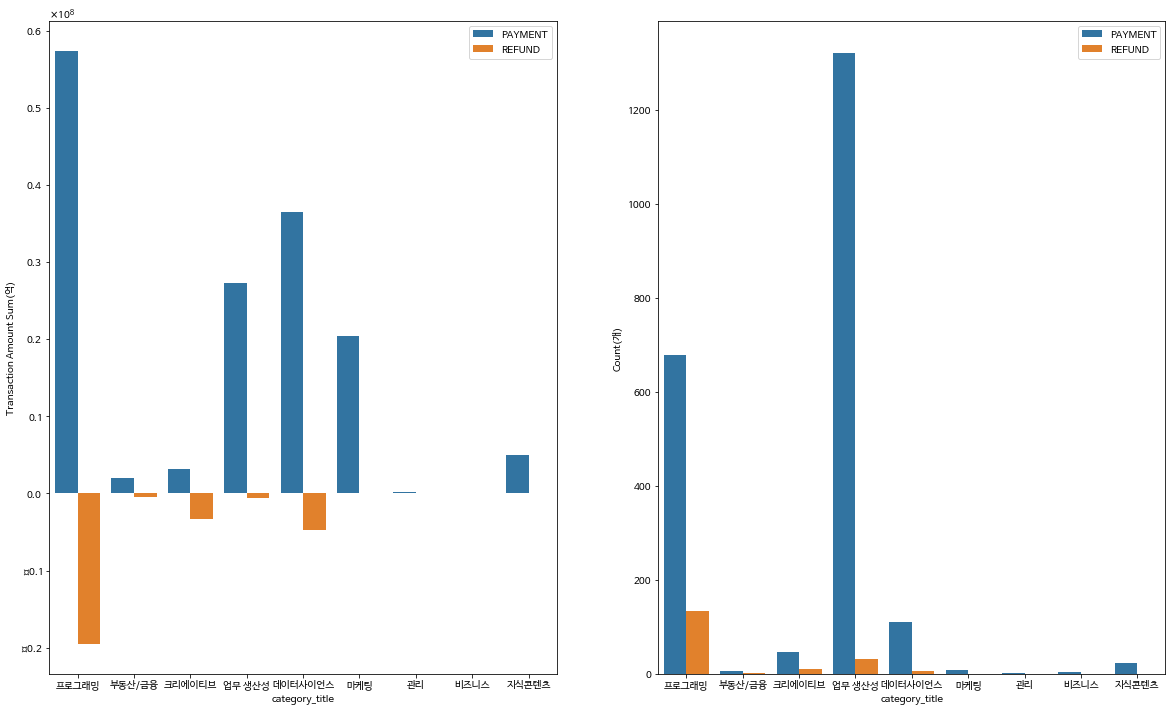

In [231]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=df_union, y='transaction_amount', x='category_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=df_union, y='id', x='category_title', hue='type',  ci=None, estimator=np.size)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

category_title별 수익과 거래 횟수를 확인할 수 있다.

### 하루10분컷

In [59]:
data_10min = df.copy()

In [60]:
data_10min = data_10min.loc[(data_10min.format=='하루10분컷'),:]

In [63]:
data_10min.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
10145,1036694,55588.0,204775.0,PAYMENT,COMPLETED,입만 열면 인정받는 스피치 10분컷,업무 생산성,하루10분컷,2021-04-28 18:20:20,19500,NaN,NaN,19500.0,NaN,2021-04-28,INICIS CARD
10155,1036738,375420.0,204773.0,PAYMENT,COMPLETED,이것만 배우면 끝 PPT 10분컷,업무 생산성,하루10분컷,2021-04-28 18:32:27,19500,NaN,NaN,19500.0,NaN,2021-04-28,KAKAO POINT
10156,1036744,116435.0,204773.0,PAYMENT,COMPLETED,이것만 배우면 끝 PPT 10분컷,업무 생산성,하루10분컷,2021-04-28 18:33:12,19500,NaN,NaN,19500.0,NaN,2021-04-28,KAKAO POINT
10186,1036953,89181.0,204774.0,PAYMENT,COMPLETED,기초 회화부터 비즈니스 영어 10분컷,업무 생산성,하루10분컷,2021-04-28 19:29:49,19500,NaN,NaN,19500.0,NaN,2021-04-28,INICIS CARD
10187,1036965,279483.0,204775.0,PAYMENT,COMPLETED,입만 열면 인정받는 스피치 10분컷,업무 생산성,하루10분컷,2021-04-28 19:32:45,19500,NaN,NaN,19500.0,NaN,2021-04-28,KAKAO POINT


In [95]:
data_10min.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 10145 to 27701
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      1359 non-null   int64         
 1   customer_id             1359 non-null   float64       
 2   course_id               1359 non-null   float64       
 3   type                    1359 non-null   object        
 4   state                   1359 non-null   object        
 5   course_title            1359 non-null   object        
 6   category_title          1359 non-null   object        
 7   format                  1359 non-null   object        
 8   completed_at            1359 non-null   datetime64[ns]
 9   transaction_amount      1359 non-null   int64         
 10  coupon_title            97 non-null     object        
 11  coupon_discount_amount  97 non-null     float64       
 12  sale_price              1359 non-null   flo

In [64]:
data_10min['transaction_amount'].value_counts()

 19900    321
 19500    274
 20300    251
 24900    164
 20700    120
 21100     95
 18270     45
 23655     17
-19500     11
 19665      9
 15920      8
-19900      5
 21500      5
 20045      4
 16880      4
 16240      4
-24900      4
 16560      3
-20300      3
-20700      2
-18270      2
 18905      1
 18525      1
 17550      1
-9750       1
-23729      1
-20000      1
-18525      1
-1000       1
Name: transaction_amount, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


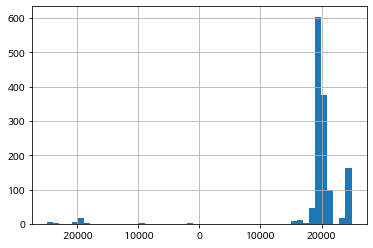

In [ ]:
data_10min['transaction_amount'].hist(bins=50)

In [106]:
data_10min['transaction_amount'].min()

-24900

In [113]:
data_10min[data_10min['transaction_amount']==data_10min['transaction_amount'].min()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
23699,1125107,383951.0,204737.0,REFUND,COMPLETED,누워서 배우는 엑셀 10분컷,업무 생산성,하루10분컷,2021-06-07 13:12:12,-24900,NaN,NaN,24900.0,NaN,2021-04-28,KAKAO POINT
24157,1127916,550599.0,204737.0,REFUND,COMPLETED,누워서 배우는 엑셀 10분컷,업무 생산성,하루10분컷,2021-06-08 15:42:34,-24900,NaN,NaN,24900.0,NaN,2021-04-28,INICIS CARD
26617,1147087,496508.0,204774.0,REFUND,COMPLETED,기초 회화부터 비즈니스 영어 10분컷,업무 생산성,하루10분컷,2021-06-17 14:45:41,-24900,NaN,NaN,24900.0,NaN,2021-04-28,NAVER TRANS
26900,1150037,565001.0,204737.0,REFUND,COMPLETED,누워서 배우는 엑셀 10분컷,업무 생산성,하루10분컷,2021-06-18 18:18:09,-24900,NaN,NaN,24900.0,NaN,2021-04-28,INICIS CARD


In [108]:
data_10min['transaction_amount'].max()

24900

In [114]:
data_10min[data_10min['transaction_amount']==data_10min['transaction_amount'].max()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
21075,1108878,420947.0,204775.0,PAYMENT,COMPLETED,입만 열면 인정받는 스피치 10분컷,업무 생산성,하루10분컷,2021-05-31 00:30:42,24900,NaN,NaN,24900.0,NaN,2021-04-28,INICIS CARD
21300,1110176,546924.0,204775.0,PAYMENT,COMPLETED,입만 열면 인정받는 스피치 10분컷,업무 생산성,하루10분컷,2021-05-31 13:44:28,24900,NaN,NaN,24900.0,NaN,2021-04-28,KAKAO CARD
21340,1110342,57723.0,204737.0,PAYMENT,COMPLETED,누워서 배우는 엑셀 10분컷,업무 생산성,하루10분컷,2021-05-31 14:29:17,24900,NaN,NaN,24900.0,NaN,2021-04-28,KAKAO CARD
21394,1110655,408618.0,204773.0,PAYMENT,COMPLETED,이것만 배우면 끝 PPT 10분컷,업무 생산성,하루10분컷,2021-05-31 15:31:59,24900,NaN,NaN,24900.0,NaN,2021-04-28,INICIS CARD
21669,1112064,547683.0,204775.0,PAYMENT,COMPLETED,입만 열면 인정받는 스피치 10분컷,업무 생산성,하루10분컷,2021-05-31 19:44:17,24900,NaN,NaN,24900.0,NaN,2021-04-28,INICIS CARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27261,1152743,390148.0,204737.0,PAYMENT,COMPLETED,누워서 배우는 엑셀 10분컷,업무 생산성,하루10분컷,2021-06-20 16:08:39,24900,NaN,NaN,24900.0,NaN,2021-04-28,KAKAO POINT
27302,1152994,69607.0,204737.0,PAYMENT,COMPLETED,누워서 배우는 엑셀 10분컷,업무 생산성,하루10분컷,2021-06-20 18:27:13,24900,NaN,NaN,24900.0,NaN,2021-04-28,PAYCO CARD
27303,1153005,69607.0,204775.0,PAYMENT,COMPLETED,입만 열면 인정받는 스피치 10분컷,업무 생산성,하루10분컷,2021-06-20 18:29:52,24900,NaN,NaN,24900.0,NaN,2021-04-28,PAYCO CARD
27360,1153313,387374.0,204737.0,PAYMENT,COMPLETED,누워서 배우는 엑셀 10분컷,업무 생산성,하루10분컷,2021-06-20 20:43:38,24900,NaN,NaN,24900.0,NaN,2021-04-28,KAKAO CARD


In [236]:
how = {
    'id' : np.size,
    'transaction_amount' : np.sum,
}
data_10min_temp = data_10min.groupby(['category_title', 'course_title', 'course_id', 'type']).agg(how)
data_10min_temp['money_divide_count'] = round(( (data_10min_temp['transaction_amount']) / (data_10min_temp['id'] )), 0)
data_10min_temp

id  \
category_title course_title          course_id type           
비즈니스           입만 열면 인정받는 스피치 10분컷   205617.0  PAYMENT    2   
               팀원에게 인정받는 리더십 하루 10분컷 205618.0  PAYMENT    2   
업무 생산성         기초 회화부터 비즈니스 영어 10분컷  204774.0  PAYMENT  256   
                                               REFUND     7   
               누워서 배우는 엑셀 10분컷       204737.0  PAYMENT  274   
                                               REFUND    12   
               이것만 배우면 끝 PPT 10분컷    204773.0  PAYMENT  171   
                                               REFUND     4   
               일상을 담는 아이패드 드로잉 10분컷  205314.0  PAYMENT   58   
                                               REFUND     2   
               입만 열면 인정받는 스피치 10분컷   204775.0  PAYMENT  529   
                                               REFUND     5   
               팀원에게 인정받는 리더십 하루 10분컷 205308.0  PAYMENT   35   
                                               REFUND     2   

                                                        transaction_amount  \
category_title course_title          course_id type                          
비즈니스           입만 열면 인정받는 스피치 10분컷   205617.0  PAYMENT               48555   
               팀원에게 인정받는 리더십 하루 10분컷 205618.0  PAYMENT               47310   
업무 생산성         기초 회화부터 비즈니스 영어 10분컷  204774.0  PAYMENT             5276640   
                                               REFUND              -124300   
               누워서 배우는 엑셀 10분컷       204737.0  PAYMENT             5701590   
                                               REFUND              -245019   
               이것만 배우면 끝 PPT 10분컷    204773.0  PAYMENT             3434455   
                                               REFUND               -78800   
               일상을 담는 아이패드 드로잉 10분컷  205314.0  PAYMENT             1213300   
                                               REFUND               -38025   
               입만 열면 인정받는 스피치 10분컷   204775.0  PAYMENT            10912245   
                                               REFUND              -100300   
               팀원에게 인정받는 리더십 하루 10분컷 205308.0  PAYMENT              717655   
                                               REFUND               -39000   

                                                        money_divide_count  
category_title course_title          course_id type                         
비즈니스           입만 열면 인정받는 스피치 10분컷   205617.0  PAYMENT             24278.0  
               팀원에게 인정받는 리더십 하루 10분컷 205618.0  PAYMENT             23655.0  
업무 생산성         기초 회화부터 비즈니스 영어 10분컷  204774.0  PAYMENT             20612.0  
                                               REFUND             -17757.0  
               누워서 배우는 엑셀 10분컷       204737.0  PAYMENT             20809.0  
                                               REFUND             -20418.0  
               이것만 배우면 끝 PPT 10분컷    204773.0  PAYMENT             20085.0  
                                               REFUND             -19700.0  
               일상을 담는 아이패드 드로잉 10분컷  205314.0  PAYMENT             20919.0  
                                               REFUND             -19012.0  
               입만 열면 인정받는 스피치 10분컷   204775.0  PAYMENT             20628.0  
                                               REFUND             -20060.0  
               팀원에게 인정받는 리더십 하루 10분컷 205308.0  PAYMENT             20504.0  
                                               REFUND             -19500.0

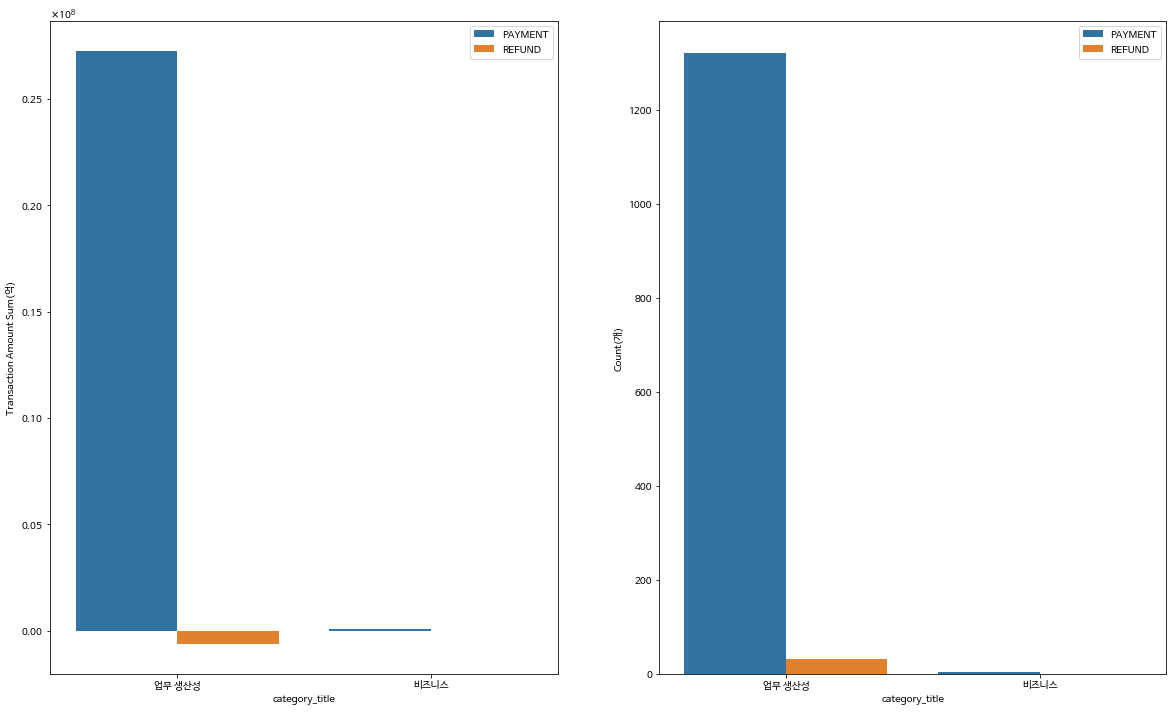

In [78]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_10min, y='transaction_amount', x='category_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_10min, y='id', x='category_title', hue='type',  ci=None, estimator=np.size)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

category_title별 수익과 거래 횟수를 확인할 수 있다. category_title에서 업무 생산성에 치우쳐져 있음을 확인할 수 있다.

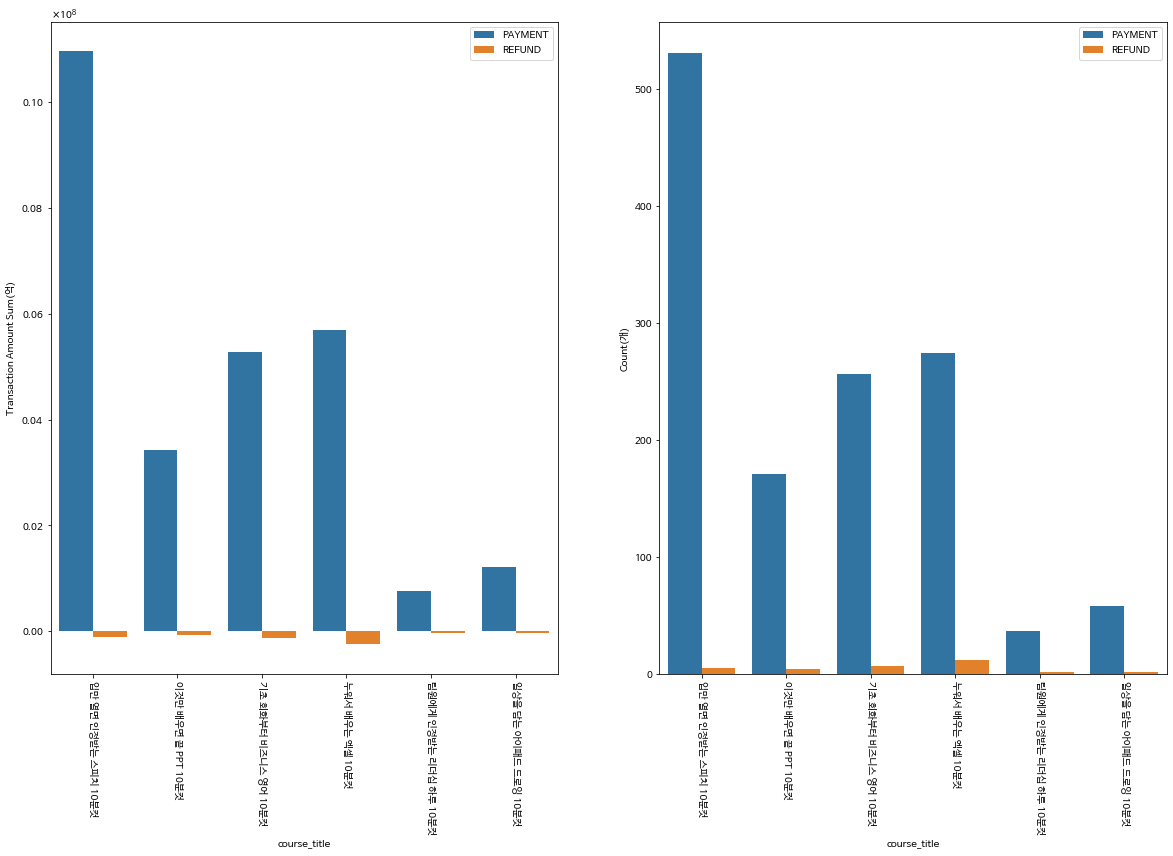

In [82]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_10min, y='transaction_amount', x='course_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_10min, y='id', x='course_title', hue='type',  ci=None, estimator=np.size)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

course_title별 수익과 거래 횟수를 확인할 수 있다. 수익과 거래횟수를 봤을 때 바람직한 그래프를 그리고 있으나 개설 강의수가 얼마 없음을 확인할 수 있다. 하루10분컷 format의 수요는 좋다고 판단이 되어 강의 개설을 더 늘리는 것이 바람직하다.

### B2G

In [129]:
data_B2G = df.copy()

In [130]:
data_B2G = data_B2G.loc[(data_B2G.format=='B2G'),:]

In [131]:
data_B2G.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
35768,1228790,467567.0,205419.0,PAYMENT,COMPLETED,(B2B) K-Digital Training 핀테크 서비스 프론트엔드 개발 과정 1기,프로그래밍,B2G,2021-07-20 12:32:15,859290,NaN,NaN,859290.0,NaN,NaT,INICIS CARD
41442,1267969,623766.0,206746.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 07:36:20,20000,NaN,NaN,20000.0,NaN,NaT,KAKAO CARD
41496,1268320,623766.0,206847.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 11:58:30,30000,NaN,NaN,30000.0,NaN,NaT,KAKAO CARD
41533,1268687,622246.0,206847.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 15:01:04,30000,NaN,NaN,30000.0,NaN,NaT,INICIS CARD
41566,1268954,624318.0,206843.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit Java & SpringBoot로 시작하는...,프로그래밍,B2G,2021-08-06 17:04:22,40000,NaN,NaN,40000.0,NaN,NaT,INICIS CARD


In [132]:
data_B2G.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 35768 to 56715
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      396 non-null    int64         
 1   customer_id             396 non-null    float64       
 2   course_id               396 non-null    float64       
 3   type                    396 non-null    object        
 4   state                   396 non-null    object        
 5   course_title            396 non-null    object        
 6   category_title          396 non-null    object        
 7   format                  396 non-null    object        
 8   completed_at            396 non-null    datetime64[ns]
 9   transaction_amount      396 non-null    int64         
 10  coupon_title            0 non-null      object        
 11  coupon_discount_amount  0 non-null      float64       
 12  sale_price              395 non-null    floa

In [133]:
data_B2G['transaction_amount'].value_counts()

 30000       141
 20000        67
 40000        49
 45000        42
-30000        42
-40000        16
-45000        15
-20000        11
 70000         2
 130000        1
 105000        1
 194200        1
 170000        1
-130000        1
 859290        1
 160000        1
 409810        1
 20000000      1
 89000         1
 169000        1
Name: transaction_amount, dtype: int64

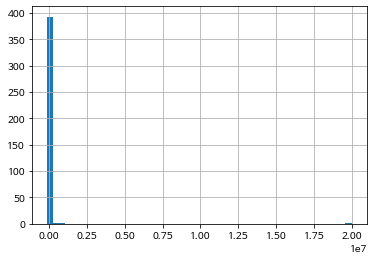

In [134]:
data_B2G['transaction_amount'].hist(bins=50)

In [135]:
data_B2G['transaction_amount'].min()

-130000

In [136]:
data_B2G[data_B2G['transaction_amount']==data_B2G['transaction_amount'].min()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
51043,1327272,552919.0,206845.0,REFUND,COMPLETED,(B2B) K-Digital Credit Python&Django로 시작하는 웹 프...,프로그래밍,B2G,2021-09-03 18:31:45,-130000,NaN,NaN,130000.0,NaN,NaT,INICIS CARD


In [137]:
data_B2G['transaction_amount'].max()

20000000

In [138]:
data_B2G[data_B2G['transaction_amount']==data_B2G['transaction_amount'].max()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
44149,1284700,572231.0,205574.0,PAYMENT,COMPLETED,(B2B) 임팩트캠퍼스 디지털 마케팅 프로젝트십,마케팅,B2G,2021-08-13 17:10:07,20000000,NaN,NaN,NaN,NaN,NaT,PG TRANSFER


In [139]:
how = {
    'id' : np.size,
    'transaction_amount' : np.sum,
}
data_B2G_temp = data_B2G.groupby(['category_title', 'course_title', 'course_id', 'type']).agg(how)
data_B2G_temp['money_divide_count'] = round(( (data_B2G_temp['transaction_amount']) / (data_B2G_temp['id'] )), 0)
data_B2G_temp

id  \
category_title course_title                                       course_id type          
마케팅            (B2B) 임팩트캠퍼스 디지털 마케팅 프로젝트십                         205574.0  PAYMENT   1   
프로그래밍          (B2B) K-Digital Credit Java & SpringBoot로 시작하는 ... 206843.0  PAYMENT  26   
                                                                            REFUND   11   
               (B2B) K-Digital Credit Java & SpringBoot로 시작하는 ... 207050.0  PAYMENT  20   
                                                                            REFUND    5   
               (B2B) K-Digital Credit Java & SpringBoot로 시작하는 ... 207654.0  PAYMENT   5   
               (B2B) K-Digital Credit Python&Django로 시작하는 웹 프로... 206845.0  PAYMENT  12   
                                                                            REFUND    9   
               (B2B) K-Digital Credit Python&Django로 시작하는 웹 프로... 207051.0  PAYMENT  11   
                                                                            REFUND    2   
               (B2B) K-Digital Credit Python&Django로 시작하는 웹 프로... 207655.0  PAYMENT   2   
                                                                            REFUND    1   
               (B2B) K-Digital Credit 나만의 iOS 앱 개발 입문_5기          206844.0  PAYMENT  18   
                                                                            REFUND    4   
               (B2B) K-Digital Credit 머신러닝 & AI 첫걸음 시작하기_4기       206846.0  PAYMENT  21   
                                                                            REFUND    8   
               (B2B) K-Digital Credit 머신러닝 & AI 첫걸음 시작하기_5기       207048.0  PAYMENT   8   
                                                                            REFUND    5   
               (B2B) K-Digital Credit 머신러닝 & AI 첫걸음 시작하기_6기       207652.0  PAYMENT   5   
               (B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_4기         206847.0  PAYMENT  65   
                                                                            REFUND   21   
               (B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_5기         207047.0  PAYMENT  40   
                                                                            REFUND    6   
               (B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_6기         207651.0  PAYMENT   7   
                                                                            REFUND    2   
               (B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_4기           206746.0  PAYMENT  34   
                                                                            REFUND    7   
               (B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_5기           207049.0  PAYMENT  27   
                                                                            REFUND    3   
               (B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_6기           207648.0  PAYMENT   7   
                                                                            REFUND    1   
               (B2B) K-Digital Training 핀테크 서비스 프론트엔드 개발 과정 1기    205419.0  PAYMENT   2   

                                                                                     transaction_amount  \
category_title course_title                                       course_id type                          
마케팅            (B2B) 임팩트캠퍼스 디지털 마케팅 프로젝트십                         205574.0  PAYMENT            20000000   
프로그래밍          (B2B) K-Digital Credit Java & SpringBoot로 시작하는 ... 206843.0  PAYMENT             1219000   
                                                                            REFUND              -440000   
               (B2B) K-Digital Credit Java & SpringBoot로 시작하는 ... 207050.0  PAYMENT              800000   
                                                                            REFUND              -200000   
               (B2B) K-Digital Credit Java & SpringBoot로 시작하는 ... 207654.0  PAYMENT              200000   
               (B2B) K-Digital Credit Python&Django로 시작하는 웹 프로... 206845.0  PAYMENT              625000   
                           

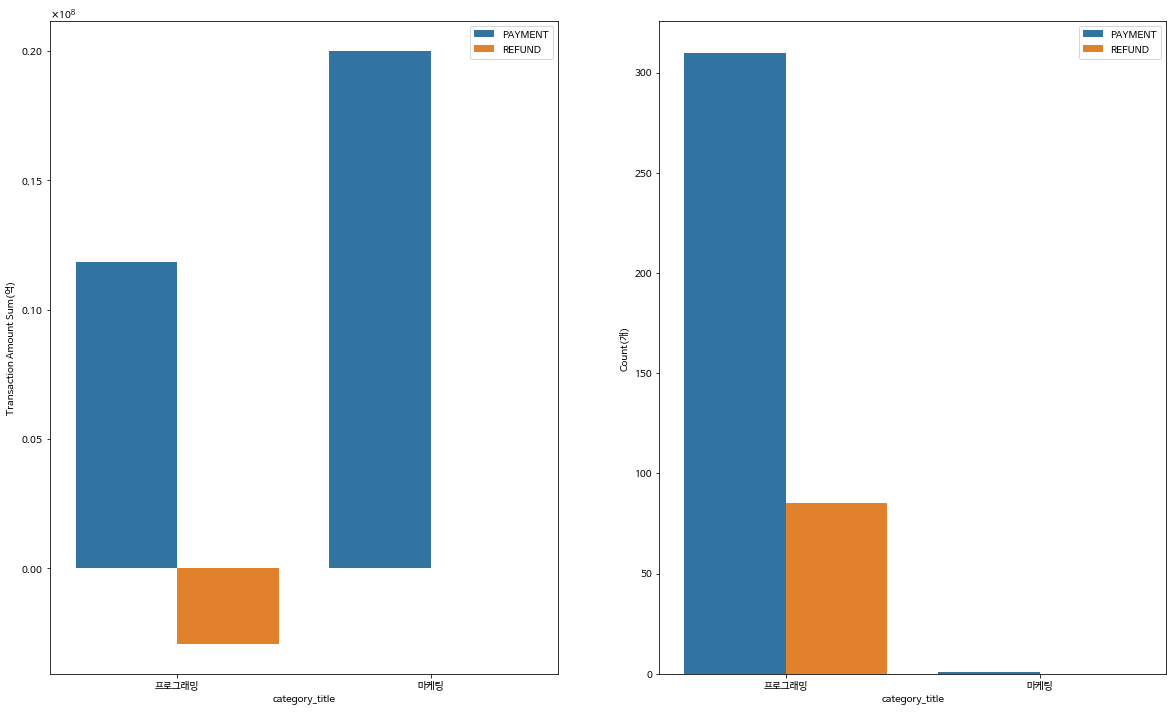

In [140]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_B2G, y='transaction_amount', x='category_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_B2G, y='id', x='category_title', hue='type',  ci=None, estimator=np.size)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

category_title별 수익과 거래 횟수를 확인할 수 있는데 category_title에서 프로그래밍과 마케팅 2가지 종류밖에 없으며 마케팅은 거래횟수가 적은데 수익은 굉장히 높은 이상치에 해당한다고 볼 수 있다.

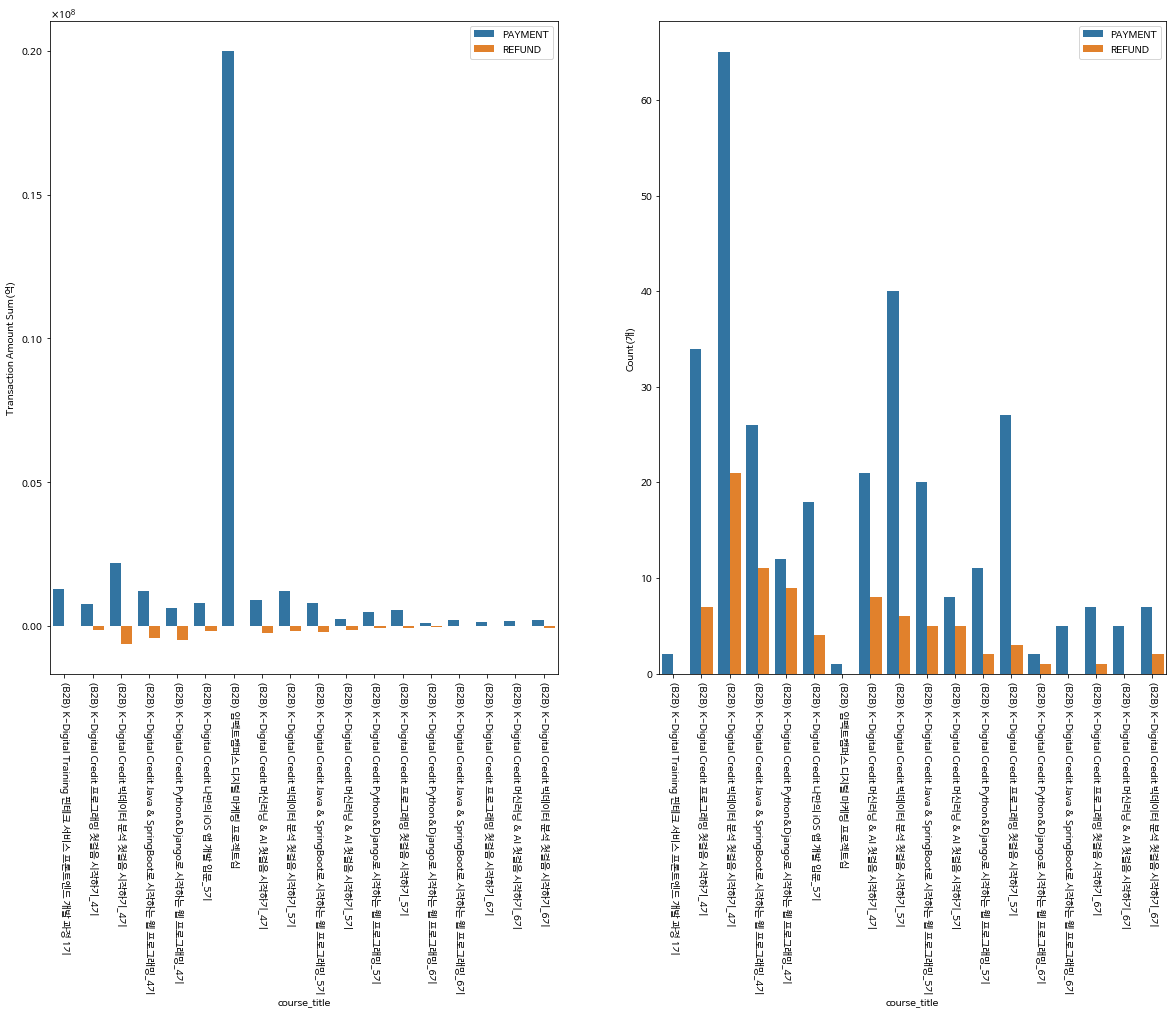

In [141]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_B2G, y='transaction_amount', x='course_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_B2G, y='id', x='course_title', hue='type',  ci=None, estimator=np.size)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

course_title별 수익과 거래 횟수를 확인할 수 있다. 수익은 '임팩트캠퍼스 디지털 마케팅 프로젝트십'에서 크게 나지만 거래횟수가 적은 이상치에 해당한다고 볼 수 있고, 거래 횟수는 몇가지를 제외하고는 환불률이 높다고 보여진다. 또한 B2G format에서는 사용된 쿠폰이 없다.

### 스쿨 온라인

In [116]:
data_school_online = df.copy()

In [117]:
data_school_online = data_school_online.loc[(data_school_online.format=='스쿨 온라인'),:]

In [118]:
data_school_online.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
0,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,2021-03-04,PG CARD
73,971265,175430.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 20:39:29,190900,NaN,NaN,190900.0,NaN,2021-03-04,PG CARD
110,971482,473334.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 21:40:24,190900,NaN,NaN,190900.0,NaN,2021-03-04,PG CARD
117,971527,478402.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 21:57:31,190900,NaN,NaN,190900.0,NaN,2021-03-04,PG CARD
119,971536,271507.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 21:59:54,171810,[10% 할인] 프론트엔드 실무 완성편,19090.0,190900.0,NaN,2021-03-04,PG CARD


In [119]:
data_school_online.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 36472
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      369 non-null    int64         
 1   customer_id             369 non-null    float64       
 2   course_id               369 non-null    float64       
 3   type                    369 non-null    object        
 4   state                   369 non-null    object        
 5   course_title            369 non-null    object        
 6   category_title          369 non-null    object        
 7   format                  369 non-null    object        
 8   completed_at            369 non-null    datetime64[ns]
 9   transaction_amount      369 non-null    int64         
 10  coupon_title            63 non-null     object        
 11  coupon_discount_amount  63 non-null     float64       
 12  sale_price              369 non-null    float64 

In [120]:
data_school_online['transaction_amount'].value_counts()

 111000    74
 122100    44
 144300    35
 142400    26
 133200    23
 192400    20
 14800     16
 191400    15
 173160    13
-33000     12
 141900     7
 191900     7
 190900     7
 85000      7
 172710     6
 51800      5
-14800      5
 14060      5
-122100     4
-192400     3
 172260     3
 171810     2
 39960      2
-144300     2
 62900      2
-142400     2
 141400     2
 132400     1
-71188      1
-111000     1
-34500      1
 1000       1
-133200     1
-173160     1
 97400      1
-11100      1
 13320      1
-111300     1
 12580      1
-33300      1
 93400      1
-39960      1
-172710     1
-191400     1
 92400      1
-171810     1
-141900     1
Name: transaction_amount, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


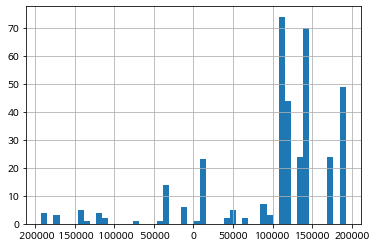

In [121]:
data_school_online['transaction_amount'].hist(bins=50)

In [122]:
data_school_online['transaction_amount'].min()

-192400

In [123]:
data_school_online[data_school_online['transaction_amount']==data_school_online['transaction_amount'].min()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
11059,1041931,133888.0,204246.0,REFUND,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-04-30 11:59:43,-192400,NaN,NaN,192400.0,NaN,2021-03-04,INICIS CARD
25859,1141048,145803.0,204246.0,REFUND,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-06-14 11:24:51,-192400,NaN,NaN,192400.0,NaN,2021-03-04,INICIS CARD
26546,1146563,562188.0,204246.0,REFUND,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-06-17 10:26:49,-192400,NaN,NaN,192400.0,NaN,2021-03-04,INICIS CARD


In [124]:
data_school_online['transaction_amount'].max()

192400

In [125]:
data_school_online[data_school_online['transaction_amount']==data_school_online['transaction_amount'].max()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
5808,1007304,436249.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-04-12 20:14:29,192400,NaN,NaN,192400.0,NaN,2021-03-04,INICIS CARD
6152,1009974,70641.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-04-14 16:03:58,192400,NaN,NaN,192400.0,NaN,2021-03-04,INICIS CARD
10748,1040164,133888.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-04-29 20:46:53,192400,NaN,NaN,192400.0,NaN,2021-03-04,INICIS CARD
15367,1067146,39263.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-05-12 17:34:47,192400,NaN,NaN,192400.0,NaN,2021-03-04,PAYCO CARD
17725,1082323,13115.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-05-19 17:28:02,192400,NaN,NaN,192400.0,NaN,2021-03-04,KAKAO POINT
17902,1083658,513847.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-05-20 11:48:17,192400,NaN,NaN,192400.0,NaN,2021-03-04,INICIS CARD
19151,1094017,101213.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-05-24 12:01:43,192400,NaN,NaN,192400.0,NaN,2021-03-04,KAKAO POINT
21398,1110665,134389.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-05-31 15:34:34,192400,NaN,NaN,192400.0,NaN,2021-03-04,KAKAO POINT
23014,1121165,538329.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-06-04 22:24:57,192400,NaN,NaN,192400.0,NaN,2021-03-04,INICIS CARD
23036,1121346,37324.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-06-05 01:57:06,192400,NaN,NaN,192400.0,NaN,2021-03-04,INICIS CARD


In [126]:
how = {
    'id' : np.size,
    'transaction_amount' : np.sum,
}
data_school_online_temp = data_school_online.groupby(['category_title', 'course_title', 'course_id', 'type']).agg(how)
data_school_online_temp['money_divide_count'] = round(( (data_school_online_temp['transaction_amount']) / (data_school_online_temp['id'] )), 0)
data_school_online_temp

id  \
category_title course_title                                       course_id type           
프로그래밍          스프링 아카데미아                                          204245.0  PAYMENT  204   
                                                                            REFUND    26   
               스프링 아카데미아 강의 11 - Spring Security를 활용한 OAuth Fr... 204688.0  REFUND     1   
               스프링 아카데미아 강의 2 - Spring Boot JPA 이해 및 성능 최적화       204679.0  PAYMENT    1   
               스프링 아카데미아 강의 4 - Spring REST Docs로 자동으로 API문서 만들기  204682.0  PAYMENT    1   
               스프링 아카데미아 강의 5 - Spring Security 인증 커스텀을 통한 서비스 구축 204684.0  PAYMENT    1   
                                                                            REFUND     2   
               스프링 아카데미아 강의 7 - Spring Batch를 활용한 데이터 일괄처리        204685.0  PAYMENT    1   
               스프링 아카데미아 강의 9 - 직접 적용해보는 TDD와 Spring Boot         204686.0  PAYMENT    1   
               시크릿 코드 : 프론트엔드 UI 컴포넌트편                            203986.0  PAYMENT    7   
                                                                            REFUND     1   
               시크릿코드 : SpringBoot/JPA (1)                         204067.0  REFUND     1   
               시크릿코드 : 프론트엔드 실무 완성편                               204246.0  PAYMENT  112   
                                                                            REFUND    10   

                                                                                     transaction_amount  \
category_title course_title                                       course_id type                          
프로그래밍          스프링 아카데미아                                          204245.0  PAYMENT            22425220   
                                                                            REFUND             -1642460   
               스프링 아카데미아 강의 11 - Spring Security를 활용한 OAuth Fr... 204688.0  REFUND               -14800   
               스프링 아카데미아 강의 2 - Spring Boot JPA 이해 및 성능 최적화       204679.0  PAYMENT               14800   
               스프링 아카데미아 강의 4 - Spring REST Docs로 자동으로 API문서 만들기  204682.0  PAYMENT               14800   
               스프링 아카데미아 강의 5 - Spring Security 인증 커스텀을 통한 서비스 구축 204684.0  PAYMENT               14800   
                                                                            REFUND               -29600   
               스프링 아카데미아 강의 7 - Spring Batch를 활용한 데이터 일괄처리        204685.0  PAYMENT               14800   
               스프링 아카데미아 강의 9 - 직접 적용해보는 TDD와 Spring Boot         204686.0  PAYMENT               14800   
               시크릿 코드 : 프론트엔드 UI 컴포넌트편                            203986.0  PAYMENT              595000   
                                                                            REFUND               -71188   
               시크릿코드 : SpringBoot/JPA (1)                         204067.0  REFUND               -34500   
               시크릿코드 : 프론트엔드 실무 완성편                               204246.0  PAYMENT            18940440   
                                                                            REFUND             -1712980   

                                                                                     money_divide_count  
category_title course_title                                       course_id type                         
프로그래밍          스프링 아카데미아                                          204245.0  PAYMENT            109928.0  
                                                                            REFUND             -63172.0  
               스프링 아카데미아 강의 11 - Spring Security를 활용한 OAuth Fr... 204688.0  REFUND             -14800.0  
               스프링 아카데미아 강의 2 - Spring Boot JPA 이해 및 성능 최적화       204679.0  PAYMENT             14800.0  
               스프링 아카데미아 강의 4 - Spring REST Docs로 자동으로 API문서 만들기  204682.0  PAYMENT             14800.0  
               스프링 아카데미아 강의 5 - Spring Security 인증 커스텀을 통한 서비스 구축 204684.0  PAYMENT             14800.0  
                                                    

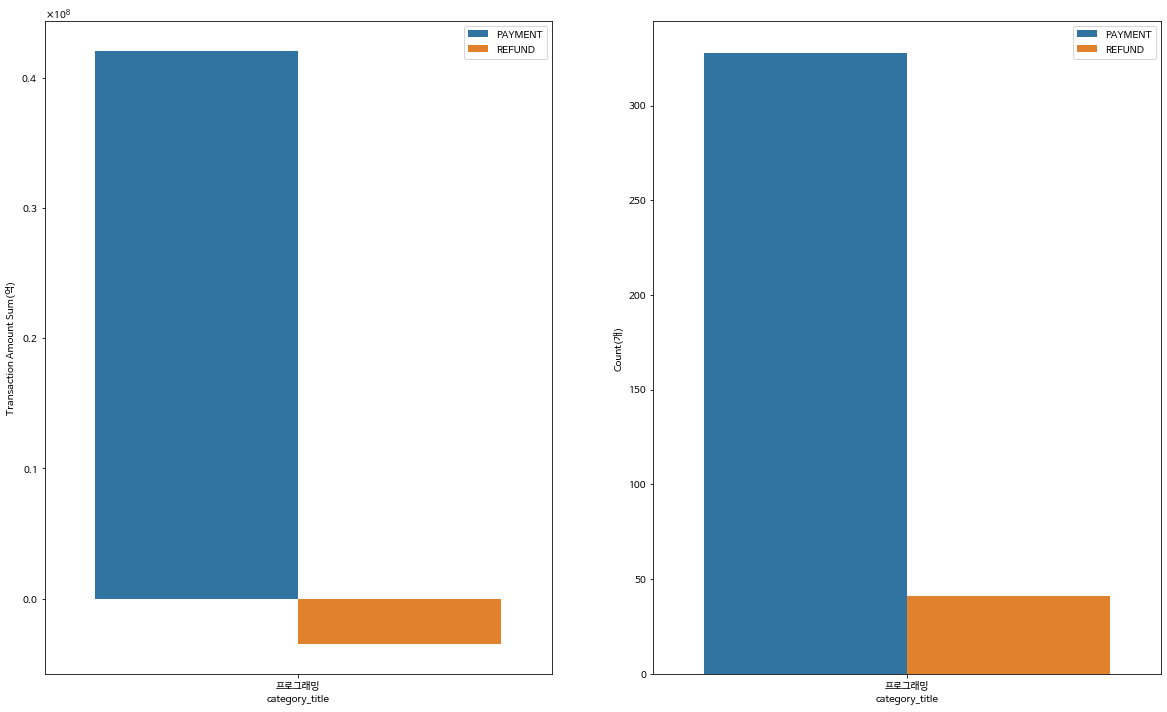

In [127]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_school_online, y='transaction_amount', x='category_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_school_online, y='id', x='category_title', hue='type',  ci=None, estimator=np.size)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

category_title별 수익과 거래 횟수를 확인할 수 있다. category_title은 프로그래밍 한가지만 존재한다.

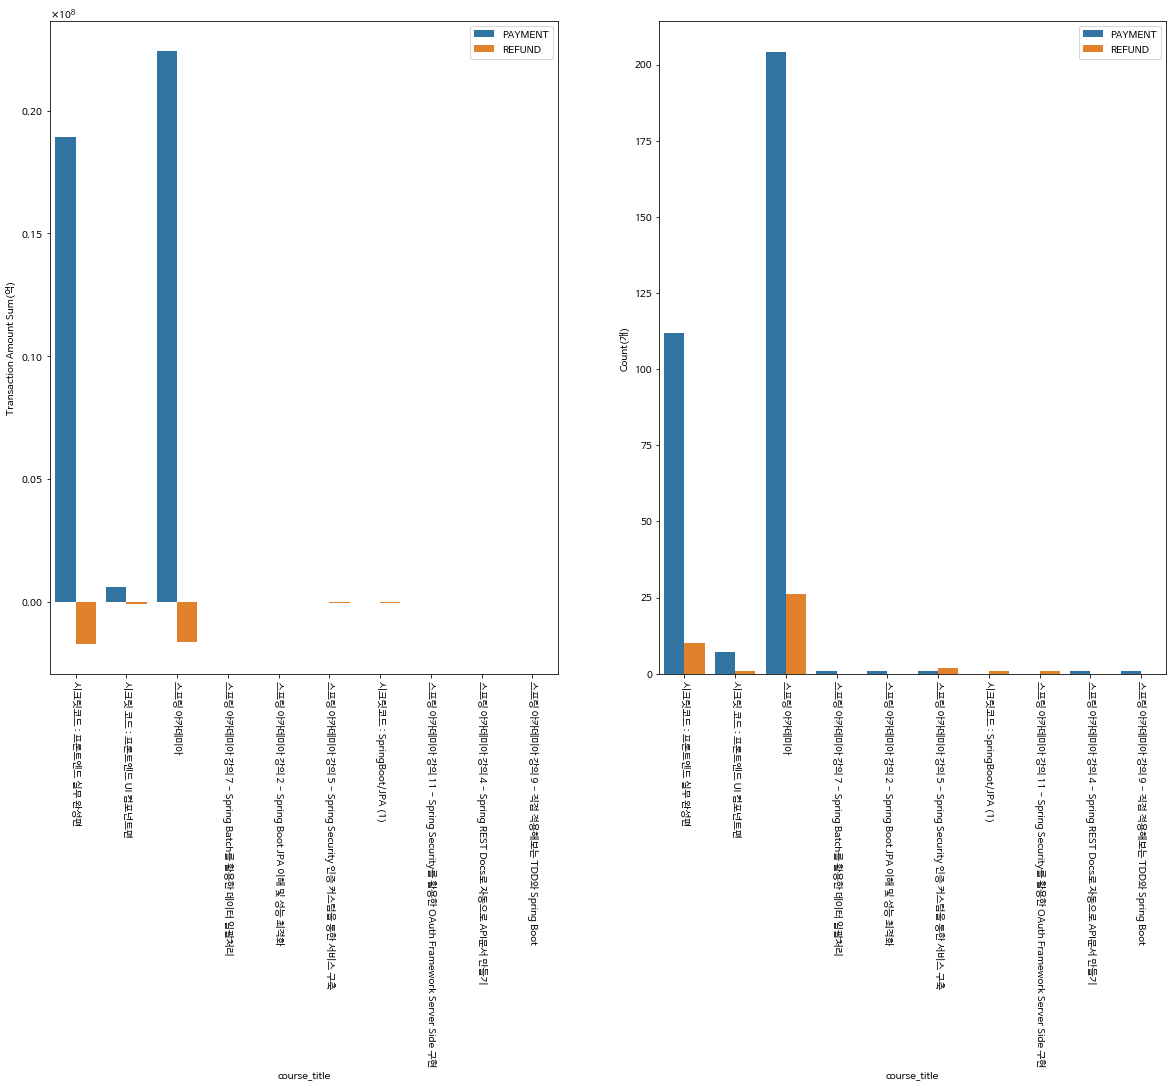

In [128]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_school_online, y='transaction_amount', x='course_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_school_online, y='id', x='course_title', hue='type',  ci=None, estimator=np.size)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

course_title별 수익과 거래 횟수를 확인할 수 있다. 수익과 거래 횟수가 2가지의 강의에 치우쳐져 있음을 확인할 수 있으므로 2가지의 강의에 초점을 맞추는게 바람직한 방향이다.

### 스쿨

In [142]:
data_school = df.copy()

In [143]:
data_school = data_school.loc[(data_school.format=='스쿨'),:]

In [144]:
data_school.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
2593,985601,140373.0,203632.0,REFUND,COMPLETED,풀스택 개발 취업 완성 스쿨 14기,프로그래밍,스쿨,2021-04-01 16:55:34,-4144074,NaN,NaN,6700000.0,NaN,NaT,PG CARD
4392,996812,87093.0,203694.0,REFUND,COMPLETED,UX/UI 디자인 스쿨 16기,크리에이티브,스쿨,2021-04-07 18:20:58,-71666,NaN,NaN,4100000.0,NaN,2020-12-02,PG CARD
5915,1008277,412486.0,203694.0,REFUND,COMPLETED,UX/UI 디자인 스쿨 16기,크리에이티브,스쿨,2021-04-13 13:37:21,-1495000,NaN,NaN,4100000.0,NaN,2020-12-02,PG CARD
9675,1033885,388238.0,203632.0,REFUND,COMPLETED,풀스택 개발 취업 완성 스쿨 14기,프로그래밍,스쿨,2021-04-27 17:54:49,-3193827,NaN,NaN,6700000.0,NaN,NaT,PG CARD
12607,1056028,425228.0,203870.0,PAYMENT,COMPLETED,데이터 사이언스 취업완성 스쿨 17기,데이터사이언스,스쿨,2021-05-03 07:06:20,469989,NaN,NaN,NaN,NaN,2020-12-23,PG ONSITE


In [145]:
data_school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 2593 to 48234
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      89 non-null     int64         
 1   customer_id             89 non-null     float64       
 2   course_id               89 non-null     float64       
 3   type                    89 non-null     object        
 4   state                   89 non-null     object        
 5   course_title            89 non-null     object        
 6   category_title          89 non-null     object        
 7   format                  89 non-null     object        
 8   completed_at            89 non-null     datetime64[ns]
 9   transaction_amount      89 non-null     int64         
 10  coupon_title            0 non-null      object        
 11  coupon_discount_amount  0 non-null      float64       
 12  sale_price              10 non-null     float6

In [146]:
data_school['transaction_amount'].value_counts()

 246086     8
 194818     7
 175240     7
 221356     6
 92282      6
 166017     6
 13835      5
 215325     4
 55339      4
 118536     3
 469989     3
 351550     2
 69211      2
 469993     2
 151568     2
 136336     2
 237168     1
 19764      1
 98874      1
 27669      1
 136946     1
 307608     1
-4144074    1
-1169382    1
 216526     1
-71666      1
-1983330    1
 49140      1
-437500     1
-431667     1
-455000     1
-2512593    1
 671420     1
-3193827    1
-1495000    1
 131832     1
Name: transaction_amount, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


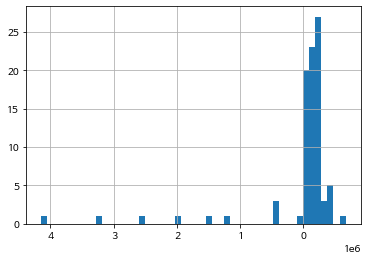

In [147]:
data_school['transaction_amount'].hist(bins=50)

In [148]:
data_school['transaction_amount'].min()

-4144074

In [149]:
data_school[data_school['transaction_amount']==data_school['transaction_amount'].min()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
2593,985601,140373.0,203632.0,REFUND,COMPLETED,풀스택 개발 취업 완성 스쿨 14기,프로그래밍,스쿨,2021-04-01 16:55:34,-4144074,NaN,NaN,6700000.0,NaN,NaT,PG CARD


In [150]:
data_school['transaction_amount'].max()

671420

In [151]:
data_school[data_school['transaction_amount']==data_school['transaction_amount'].max()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
12610,1056020,409454.0,203870.0,PAYMENT,COMPLETED,데이터 사이언스 취업완성 스쿨 17기,데이터사이언스,스쿨,2021-05-03 07:12:02,671420,NaN,NaN,NaN,NaN,2020-12-23,PG ONSITE


In [152]:
how = {
    'id' : np.size,
    'transaction_amount' : np.sum,
}
data_school_temp = data_school.groupby(['category_title', 'course_title', 'course_id', 'type']).agg(how)
data_school_temp['money_divide_count'] = round(( (data_school_temp['transaction_amount']) / (data_school_temp['id'] )), 0)
data_school_temp

,,,,id,transaction_amount,money_divide_count
category_title,course_title,course_id,type,,,
데이터사이언스,데이터 사이언스 취업완성 스쿨 17기,203870.0,PAYMENT,79,14608693,184920.0
크리에이티브,UX/UI 디자인 스쿨 16기,203694.0,REFUND,5,-2890833,-578167.0
프로그래밍,풀스택 개발 취업 완성 스쿨 14기,203632.0,REFUND,5,-13003206,-2600641.0


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


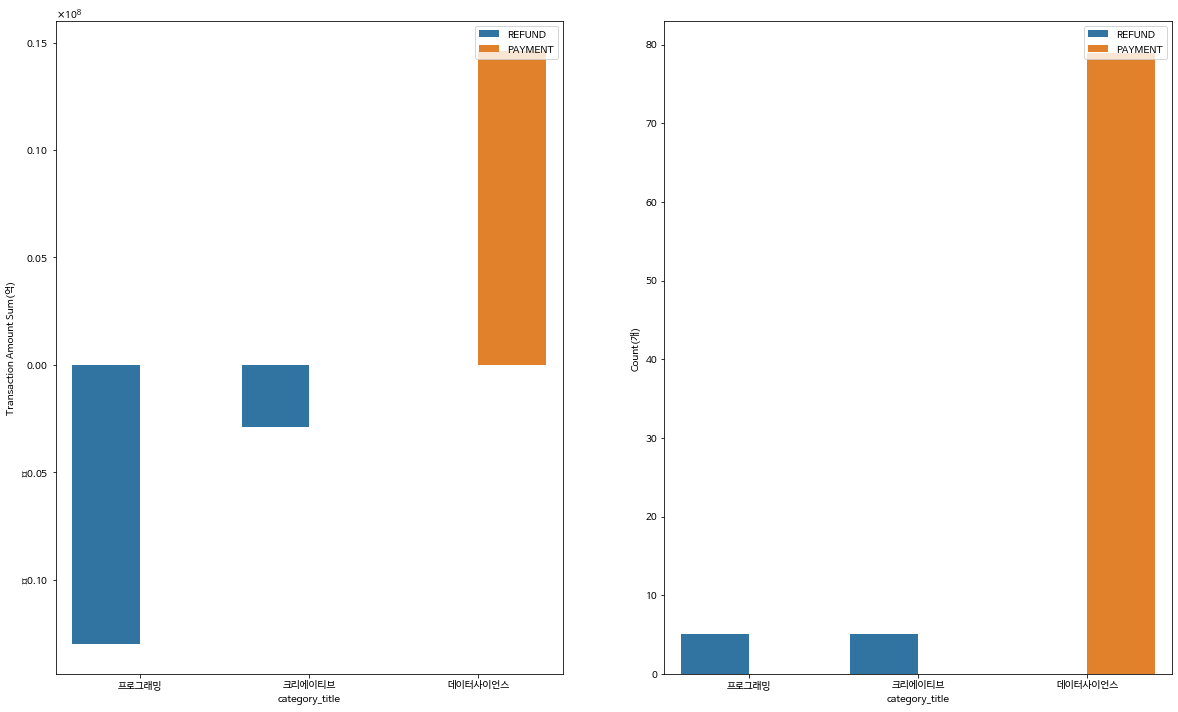

In [153]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_school, y='transaction_amount', x='category_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_school, y='id', x='category_title', hue='type',  ci=None, estimator=np.size)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

category_title별 수익과 거래 횟수를 확인할 수 있다. category_title이 프로그래밍과 크리에이티브 같은 경우에는 type이 REFUND만 존재하므로 이상치에 해당한다고 볼 수 있다.

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


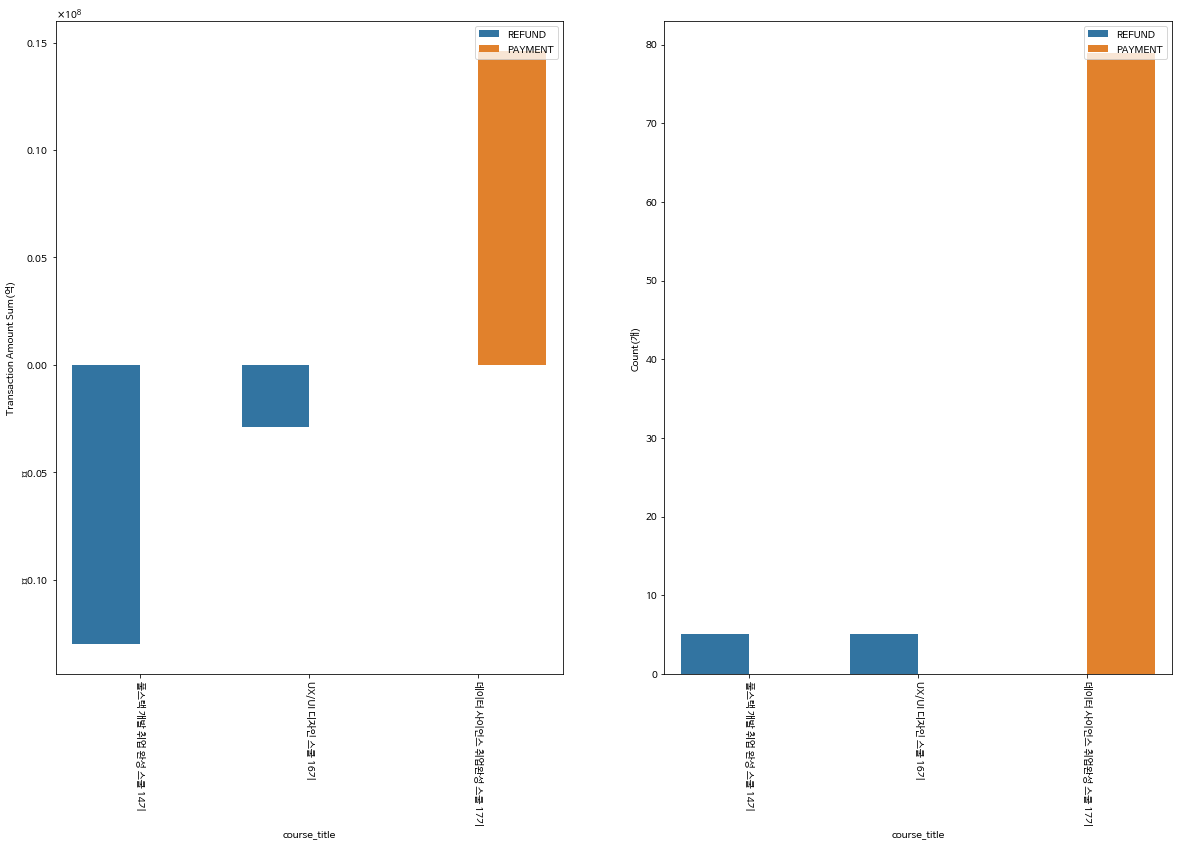

In [154]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_school, y='transaction_amount', x='course_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_school, y='id', x='course_title', hue='type',  ci=None, estimator=np.size)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

course_title별 수익과 거래 횟수를 확인할 수 있다. course_title도 프로그래밍과 크리에이티브 같은 경우에는 type이 REFUND만 존재하므로 이상치에 해당한다고 볼 수 있다. 스쿨 format에서 쿠폰이 사용되지 않았다.

### 이벤트

In [155]:
data_event = df.copy()

In [157]:
data_event = data_event.loc[(data_event.format=='이벤트'),:]

In [158]:
data_event.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
8055,1024307,33540.0,205048.0,PAYMENT,COMPLETED,[120일 수강 가능] 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,이벤트,2021-04-23 12:05:45,50000,NaN,NaN,50000.0,NaN,2021-02-02,INICIS CARD
8071,1024493,505611.0,205056.0,PAYMENT,COMPLETED,[120일 수강 가능] 초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,크리에이티브,이벤트,2021-04-23 13:29:36,50000,NaN,NaN,50000.0,NaN,2020-12-02,INICIS VBANK
8139,1025073,48130.0,205055.0,PAYMENT,COMPLETED,[120일 수강 가능] 초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개...,프로그래밍,이벤트,2021-04-23 17:08:08,50000,NaN,NaN,50000.0,NaN,2021-02-01,INICIS CARD
8179,1025452,279483.0,205048.0,PAYMENT,COMPLETED,[120일 수강 가능] 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,이벤트,2021-04-23 19:40:51,50000,NaN,NaN,50000.0,NaN,2021-02-02,INICIS CARD
8186,1025532,378903.0,205056.0,PAYMENT,COMPLETED,[120일 수강 가능] 초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,크리에이티브,이벤트,2021-04-23 20:48:11,50000,NaN,NaN,50000.0,NaN,2020-12-02,INICIS CARD


In [159]:
data_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 8055 to 14496
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      89 non-null     int64         
 1   customer_id             89 non-null     float64       
 2   course_id               89 non-null     float64       
 3   type                    89 non-null     object        
 4   state                   89 non-null     object        
 5   course_title            89 non-null     object        
 6   category_title          89 non-null     object        
 7   format                  89 non-null     object        
 8   completed_at            89 non-null     datetime64[ns]
 9   transaction_amount      89 non-null     int64         
 10  coupon_title            0 non-null      object        
 11  coupon_discount_amount  0 non-null      float64       
 12  sale_price              89 non-null     float6

In [160]:
data_event['transaction_amount'].value_counts()

 55000    49
 66000    16
 77000     9
 50000     8
-55000     2
-77000     2
-66000     2
-50000     1
Name: transaction_amount, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


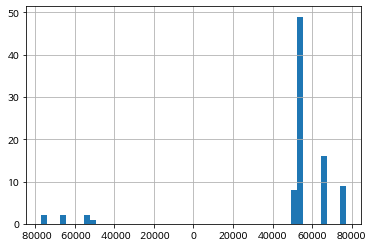

In [161]:
data_event['transaction_amount'].hist(bins=50)

In [162]:
data_event['transaction_amount'].min()

-77000

In [163]:
data_event[data_event['transaction_amount']==data_event['transaction_amount'].min()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
12778,1051014,516228.0,205100.0,REFUND,COMPLETED,[120일 수강 가능] 초격차 패키지 : 한번에 끝내는 UX/UI 디자인,크리에이티브,이벤트,2021-05-03 18:16:12,-77000,NaN,NaN,77000.0,NaN,2020-12-18,INICIS CARD
14404,1062039,521404.0,205100.0,REFUND,COMPLETED,[120일 수강 가능] 초격차 패키지 : 한번에 끝내는 UX/UI 디자인,크리에이티브,이벤트,2021-05-10 10:23:58,-77000,NaN,NaN,77000.0,NaN,2020-12-18,INICIS CARD


In [164]:
data_event['transaction_amount'].max()

77000

In [165]:
data_event[data_event['transaction_amount']==data_event['transaction_amount'].max()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
12155,1047502,521404.0,205100.0,PAYMENT,COMPLETED,[120일 수강 가능] 초격차 패키지 : 한번에 끝내는 UX/UI 디자인,크리에이티브,이벤트,2021-05-01 17:34:01,77000,NaN,NaN,77000.0,NaN,2020-12-18 00:00:00,INICIS CARD
12170,1047661,479953.0,205100.0,PAYMENT,COMPLETED,[120일 수강 가능] 초격차 패키지 : 한번에 끝내는 UX/UI 디자인,크리에이티브,이벤트,2021-05-01 18:41:17,77000,NaN,NaN,77000.0,NaN,2020-12-18 00:00:00,KAKAO POINT
12208,1047864,513820.0,205107.0,PAYMENT,COMPLETED,[120일 수강 가능] 올인원 패키지 : Financial Modeling,부동산/금융,이벤트,2021-05-01 21:01:28,77000,NaN,NaN,77000.0,NaN,2020-04-17 00:00:00,INICIS CARD
12209,1047867,432919.0,205100.0,PAYMENT,COMPLETED,[120일 수강 가능] 초격차 패키지 : 한번에 끝내는 UX/UI 디자인,크리에이티브,이벤트,2021-05-01 21:03:25,77000,NaN,NaN,77000.0,NaN,2020-12-18 00:00:00,KAKAO POINT
12321,1048505,456566.0,205100.0,PAYMENT,COMPLETED,[120일 수강 가능] 초격차 패키지 : 한번에 끝내는 UX/UI 디자인,크리에이티브,이벤트,2021-05-02 12:04:00,77000,NaN,NaN,77000.0,NaN,2020-12-18 00:00:00,INICIS CARD
12379,1048831,464321.0,205101.0,PAYMENT,COMPLETED,[120일 수강 가능] 초격차 패키지 : 한번에 끝내는 디자인 툴,크리에이티브,이벤트,2021-05-02 16:13:11,77000,NaN,NaN,77000.0,NaN,2020-12-24 11:00:00,KAKAO CARD
12442,1049186,487134.0,205101.0,PAYMENT,COMPLETED,[120일 수강 가능] 초격차 패키지 : 한번에 끝내는 디자인 툴,크리에이티브,이벤트,2021-05-02 19:03:26,77000,NaN,NaN,77000.0,NaN,2020-12-24 11:00:00,INICIS CARD
12564,1049784,92253.0,205100.0,PAYMENT,COMPLETED,[120일 수강 가능] 초격차 패키지 : 한번에 끝내는 UX/UI 디자인,크리에이티브,이벤트,2021-05-02 23:30:09,77000,NaN,NaN,77000.0,NaN,2020-12-18 00:00:00,INICIS CARD
12576,1049838,516228.0,205100.0,PAYMENT,COMPLETED,[120일 수강 가능] 초격차 패키지 : 한번에 끝내는 UX/UI 디자인,크리에이티브,이벤트,2021-05-02 23:43:44,77000,NaN,NaN,77000.0,NaN,2020-12-18 00:00:00,INICIS CARD


In [166]:
how = {
    'id' : np.size,
    'transaction_amount' : np.sum,
}
data_event_temp = data_event.groupby(['category_title', 'course_title', 'course_id', 'type']).agg(how)
data_event_temp['money_divide_count'] = round(( (data_event_temp['transaction_amount']) / (data_event_temp['id'] )), 0)
data_event_temp

id  \
category_title course_title                                       course_id type          
데이터사이언스        [120일 수강 가능] 올인원 패키지 : 모두를 위한 SQL/DB               205096.0  PAYMENT   7   
                                                                            REFUND    1   
               [120일 수강 가능] 올인원 패키지 : 직장인을 위한 파이썬 데이터분석           205097.0  PAYMENT   4   
                                                                            REFUND    1   
               [120일 수강 가능] 초격차 패키지 : 한 번에 끝내는 데이터 분석 툴           205099.0  PAYMENT   5   
                                                                            REFUND    1   
마케팅            [120일 수강 가능] 올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기       205106.0  PAYMENT   2   
               [120일 수강 가능] 올인원 패키지 : 디지털 마케팅 MAX 2020            205105.0  PAYMENT   5   
부동산/금융         [120일 수강 가능] 올인원 패키지 : Financial Modeling          205107.0  PAYMENT   1   
               [120일 수강 가능] 올인원 패키지 : 재무/세무 회계 실무 완성              205108.0  PAYMENT   3   
크리에이티브         [120일 수강 가능] 초격차 패키지 : 한번에 끝내는 UX/UI 디자인           205100.0  PAYMENT   6   
                                                                            REFUND    2   
               [120일 수강 가능] 초격차 패키지 : 한번에 끝내는 디자인 툴               205101.0  PAYMENT   2   
               [120일 수강 가능] 초격차 패키지 : 한번에 끝내는 영상 촬영과 편집           205056.0  PAYMENT   8   
프로그래밍          [120일 수강 가능] 올인원 패키지 : 알고리즘 기술면접 완전 정복             205095.0  PAYMENT   5   
               [120일 수강 가능] 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발           205048.0  PAYMENT  21   
                                                                            REFUND    1   
               [120일 수강 가능] 초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발... 205055.0  PAYMENT  13   
                                                                            REFUND    1   

                                                                                     transaction_amount  \
category_title course_title                                       course_id type                          
데이터사이언스        [120일 수강 가능] 올인원 패키지 : 모두를 위한 SQL/DB               205096.0  PAYMENT              462000   
                                                                            REFUND               -66000   
               [120일 수강 가능] 올인원 패키지 : 직장인을 위한 파이썬 데이터분석           205097.0  PAYMENT              264000   
                                                                            REFUND               -66000   
               [120일 수강 가능] 초격차 패키지 : 한 번에 끝내는 데이터 분석 툴           205099.0  PAYMENT              275000   
                                                                            REFUND               -55000   
마케팅            [120일 수강 가능] 올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기       205106.0  PAYMENT              110000   
               [120일 수강 가능] 올인원 패키지 : 디지털 마케팅 MAX 2020            205105.0  PAYMENT              330000   
부동산/금융         [120일 수강 가능] 올인원 패키지 : Financial Modeling          205107.0  PAYMENT               77000   
               [120일 수강 가능] 올인원 패키지 : 재무/세무 회계 실무 완성              205108.0  PAYMENT              165000   
크리에이티브         [120일 수강 가능] 초격차 패키지 : 한번에 끝내는 UX/UI 디자인           205100.0  PAYMENT              462000   
                                                                            REFUND              -154000   
               [120일 수강 가능] 초격차 패키지 : 한번에 끝내는 디자인 툴               205101.0  PAYMENT              154000   
               [120일 수강 가능] 초격차 패키지 : 한번에 끝내는 영상 촬영과 편집           205056.0  PAYMENT              430000   
프로그래밍          [120일 수강 가능] 올인원 패키지 : 알고리즘 기술면접 완전 정복             205095.0  PAYMENT              275000   
               [120일 수강 가능] 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발           205048.0  PAYMENT             1135000   
                                                                            REFUND               -55000   
               [120일 수강 가능] 초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발... 205055.0  PAYMENT              705000   
                                 

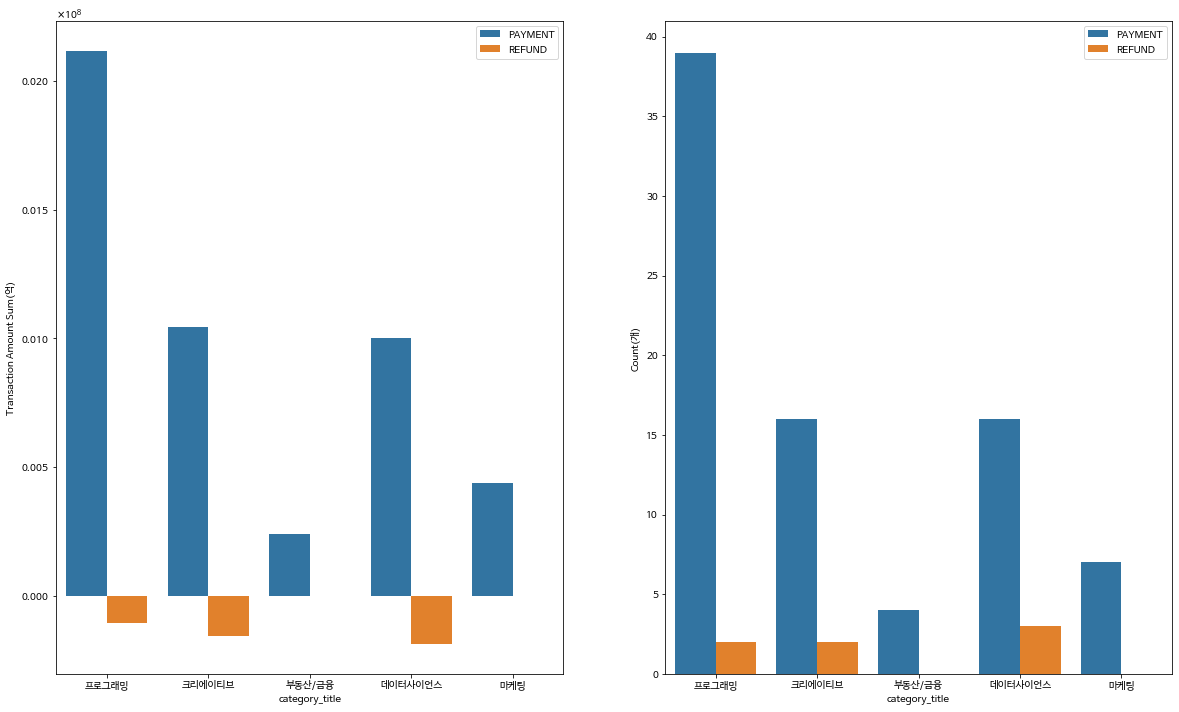

In [167]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_event, y='transaction_amount', x='category_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_event, y='id', x='category_title', hue='type',  ci=None, estimator=np.size)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

category_title별 수익과 거래 횟수를 확인할 수 있다. category_title이 프로그래밍인 그래프가 수익 및 거래횟수가 다른 category_title에 비해 높은 비율을 차지한다.

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


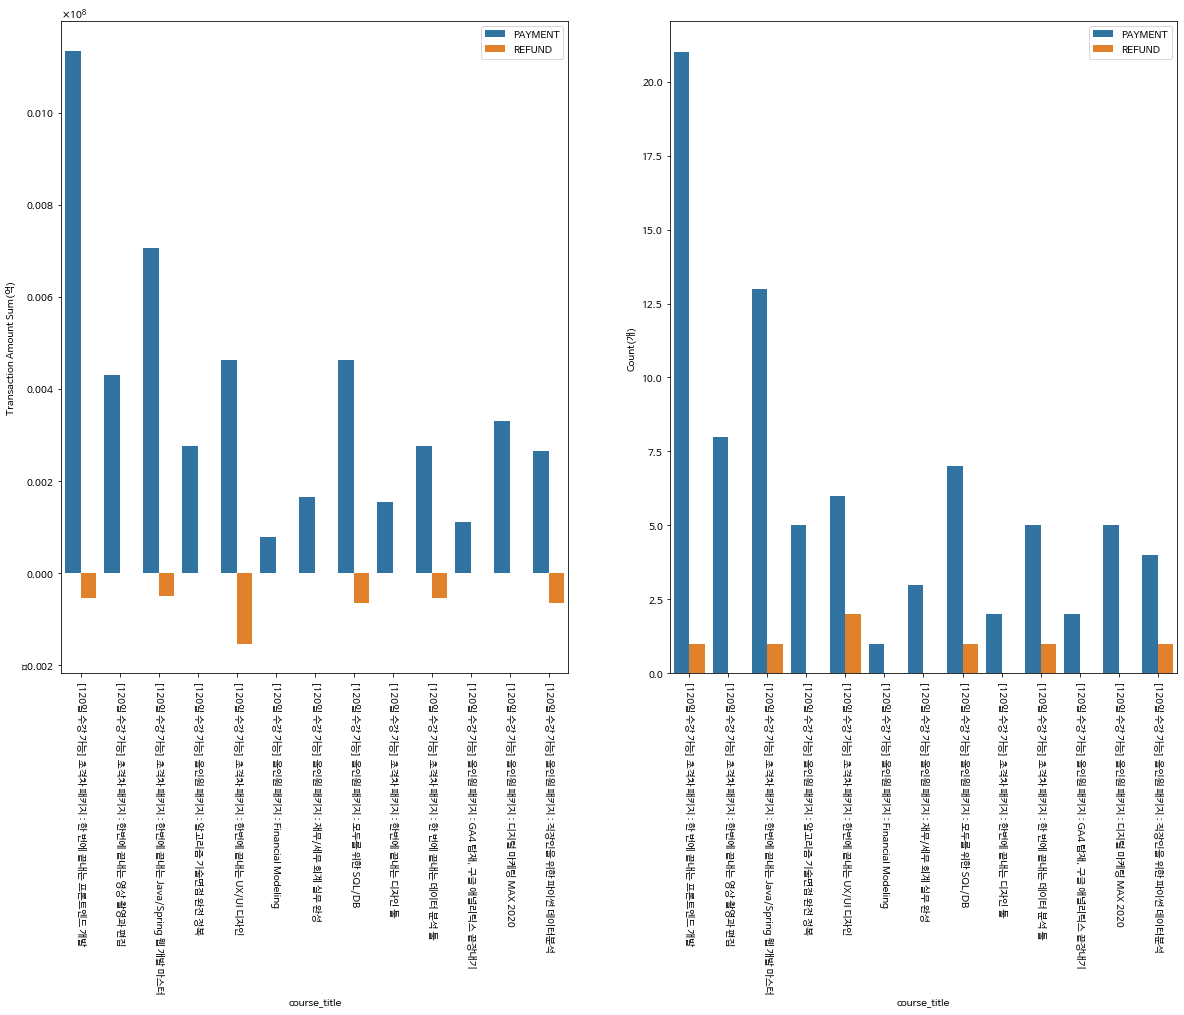

In [168]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_event, y='transaction_amount', x='course_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_event, y='id', x='course_title', hue='type',  ci=None, estimator=np.size)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

course_title별 수익과 거래 횟수를 확인할 수 있다. course_title별 수익과 거래 횟수가 고루 분포하는 편이다. 이벤트 format에서 쿠폰이 사용되지 않았다.

### 아카이브

In [169]:
data_archive = df.copy()

In [170]:
data_archive = data_archive.loc[(data_archive.format=='아카이브'),:]

In [171]:
data_archive.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
14542,1062649,407849.0,204518.0,PAYMENT,COMPLETED,Archive-Octane Render BASIC,크리에이티브,아카이브,2021-05-10 15:09:42,79000,NaN,NaN,79000.0,NaN,2021-05-10,INICIS CARD
14963,1064882,525432.0,204518.0,PAYMENT,COMPLETED,Archive-Octane Render BASIC,크리에이티브,아카이브,2021-05-11 15:37:54,71100,[10% 할인 쿠폰] 옥테인 렌더 BASIC 오픈 기념,7900.0,79000.0,NaN,2021-05-10,KAKAO CARD
15007,1065051,525518.0,204518.0,PAYMENT,COMPLETED,Archive-Octane Render BASIC,크리에이티브,아카이브,2021-05-11 16:52:38,79000,NaN,NaN,79000.0,NaN,2021-05-10,KAKAO CARD
15116,1065704,525927.0,204518.0,PAYMENT,COMPLETED,Archive-Octane Render BASIC,크리에이티브,아카이브,2021-05-11 22:32:32,69000,[만원 할인] 옥테인 렌더 BASIC 오픈 기념,10000.0,79000.0,NaN,2021-05-10,KAKAO POINT
15327,1066879,526634.0,204518.0,REFUND,COMPLETED,Archive-Octane Render BASIC,크리에이티브,아카이브,2021-05-12 15:50:41,-71100,NaN,NaN,79000.0,NaN,2021-05-10,INICIS CARD


In [172]:
data_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 14542 to 34669
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      35 non-null     int64         
 1   customer_id             35 non-null     float64       
 2   course_id               35 non-null     float64       
 3   type                    35 non-null     object        
 4   state                   35 non-null     object        
 5   course_title            35 non-null     object        
 6   category_title          35 non-null     object        
 7   format                  35 non-null     object        
 8   completed_at            35 non-null     datetime64[ns]
 9   transaction_amount      35 non-null     int64         
 10  coupon_title            23 non-null     object        
 11  coupon_discount_amount  23 non-null     float64       
 12  sale_price              35 non-null     float

In [173]:
data_archive['transaction_amount'].value_counts()

 64000    11
 71100     9
 79000     5
 80000     3
 69000     2
-71100     2
-79000     1
 65000     1
-65000     1
Name: transaction_amount, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


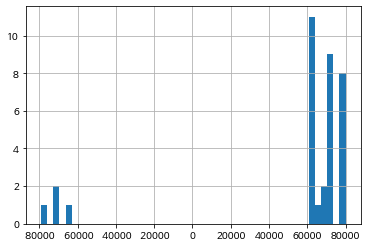

In [174]:
data_archive['transaction_amount'].hist(bins=50)

In [175]:
data_archive['transaction_amount'].min()

-79000

In [176]:
data_archive[data_archive['transaction_amount']==data_archive['transaction_amount'].min()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
16968,1077474,102038.0,204518.0,REFUND,COMPLETED,Archive-Octane Render BASIC,크리에이티브,아카이브,2021-05-17 10:41:07,-79000,NaN,NaN,79000.0,NaN,2021-05-10,KAKAO CARD


In [177]:
data_archive['transaction_amount'].max()

80000

In [178]:
data_archive[data_archive['transaction_amount']==data_archive['transaction_amount'].max()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
22882,1120064,551700.0,204518.0,PAYMENT,COMPLETED,Archive-Octane Render BASIC,크리에이티브,아카이브,2021-06-04 10:59:48,80000,NaN,NaN,80000.0,NaN,2021-05-10,KAKAO POINT
34658,1219633,135099.0,205746.0,PAYMENT,COMPLETED,Archive-Octane Render BASIC,크리에이티브,아카이브,2021-07-16 00:36:55,80000,NaN,NaN,80000.0,NaN,2021-05-10,INICIS CARD
34669,1219797,128550.0,205746.0,PAYMENT,COMPLETED,Archive-Octane Render BASIC,크리에이티브,아카이브,2021-07-16 04:00:32,80000,NaN,NaN,80000.0,NaN,2021-05-10,INICIS CARD


In [179]:
how = {
    'id' : np.size,
    'transaction_amount' : np.sum,
}
data_archive_temp = data_archive.groupby(['category_title', 'course_title', 'course_id', 'type']).agg(how)
data_archive_temp['money_divide_count'] = round(( (data_archive_temp['transaction_amount']) / (data_archive_temp['id'] )), 0)
data_archive_temp

id  \
category_title course_title                course_id type          
크리에이티브         Archive-Octane Render BASIC 204518.0  PAYMENT  29   
                                                     REFUND    4   
                                           205746.0  PAYMENT   2   

                                                              transaction_amount  \
category_title course_title                course_id type                          
크리에이티브         Archive-Octane Render BASIC 204518.0  PAYMENT             2021900   
                                                     REFUND              -286200   
                                           205746.0  PAYMENT              160000   

                                                              money_divide_count  
category_title course_title                course_id type                         
크리에이티브         Archive-Octane Render BASIC 204518.0  PAYMENT             69721.0  
                                                     REFUND             -71550.0  
                                           205746.0  PAYMENT             80000.0

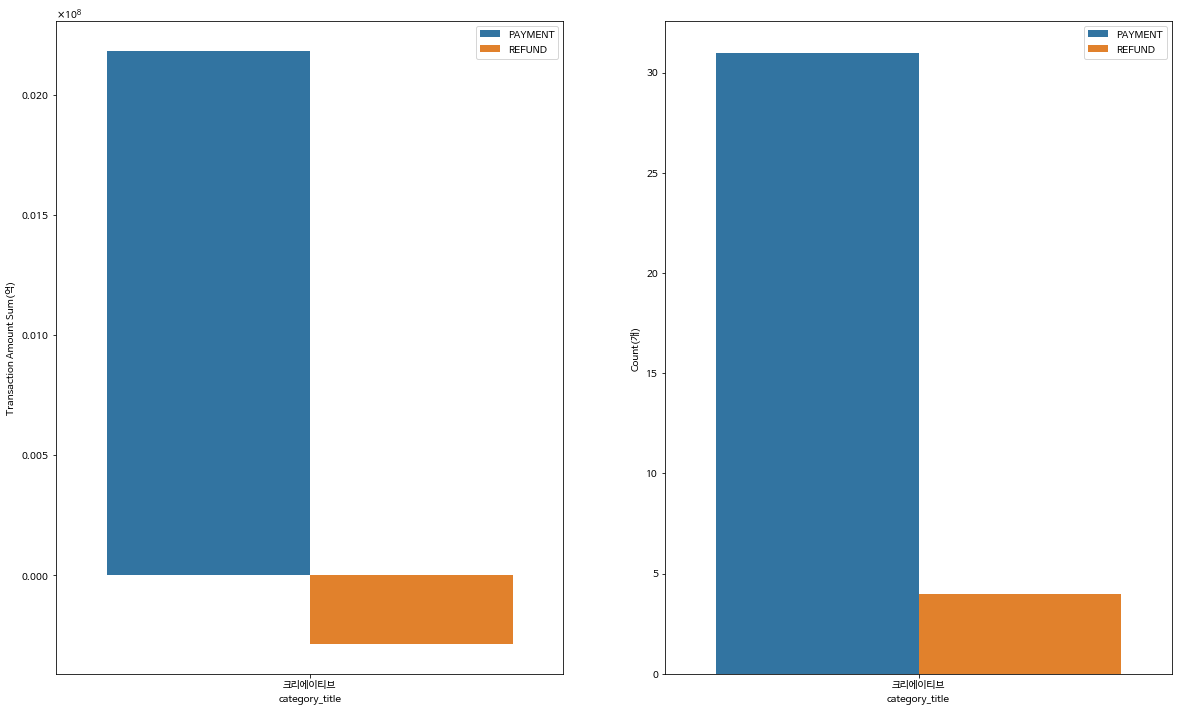

In [180]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_archive, y='transaction_amount', x='category_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_archive, y='id', x='category_title', hue='type',  ci=None, estimator=np.size)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

category_title별 수익과 거래 횟수를 확인할 수 있다. category_title이 크리에이티브 한가지만 존재한다.

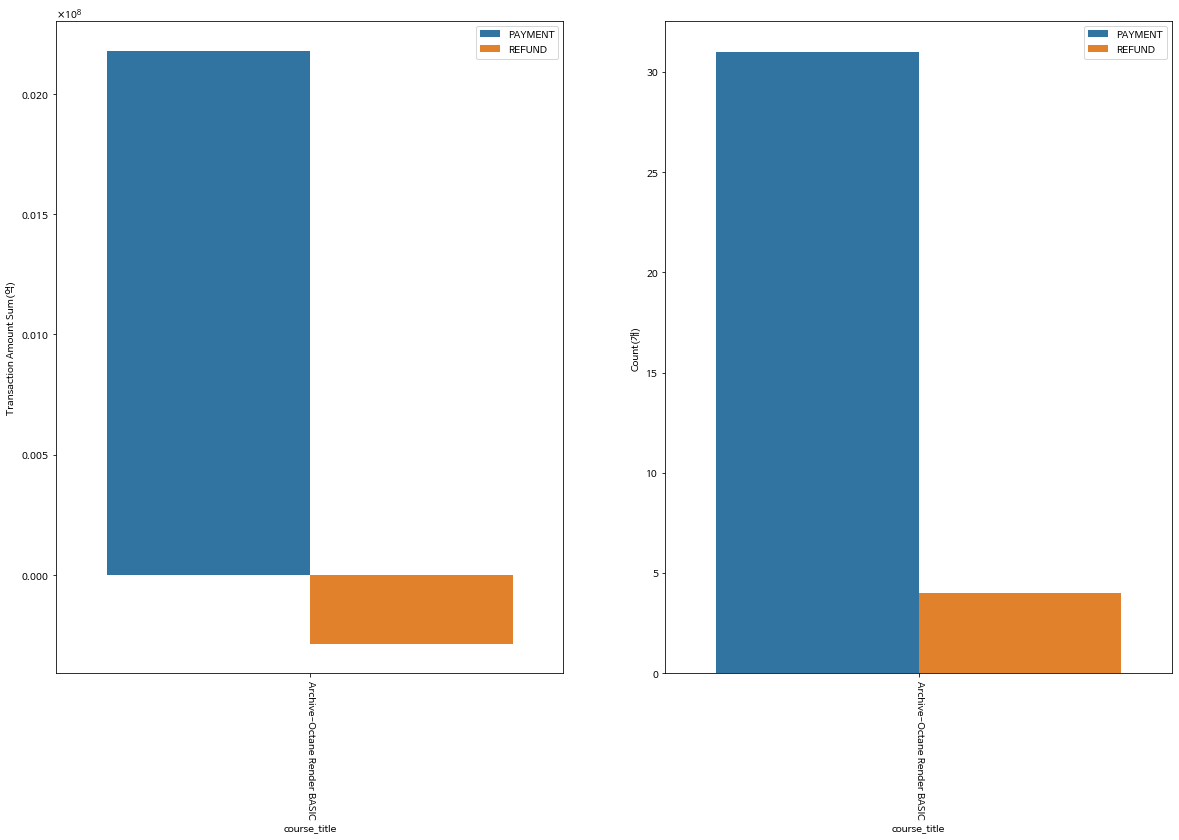

In [181]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_archive, y='transaction_amount', x='course_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_archive, y='id', x='course_title', hue='type',  ci=None, estimator=np.size)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

course_title별 수익과 거래 횟수를 확인할 수 있다. course_title도 한가지만 존재한다. 아카이브 format에서 쿠폰이 사용되는 비율이 높다.

### 캠프

In [182]:
data_camp = df.copy()

In [183]:
data_camp = data_camp.loc[(data_camp.format=='캠프'),:]

In [184]:
data_camp.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
4303,996553,224423.0,204149.0,PAYMENT,COMPLETED,부동산 금융 실무 : 엑셀을 활용한 부동산 사업성 분석 16기,부동산/금융,캠프,2021-04-07 15:03:42,1040000,NaN,NaN,1140000.0,NaN,2021-02-08,PG TRANSFER
17872,1083711,448344.0,204149.0,PAYMENT,COMPLETED,부동산 금융 실무 : 엑셀을 활용한 부동산 사업성 분석 16기,부동산/금융,캠프,2021-05-20 10:33:19,14000,NaN,NaN,1140000.0,NaN,2021-02-08,PG TRANSFER
24465,1129948,496508.0,203539.0,PAYMENT,COMPLETED,파이썬을 활용한 전자공시 분석 자동화 8기,부동산/금융,캠프,2021-06-09 16:22:40,750000,NaN,NaN,750000.0,NaN,2020-12-07,NAVER CARD
26621,1147105,496508.0,203539.0,REFUND,COMPLETED,파이썬을 활용한 전자공시 분석 자동화 8기,부동산/금융,캠프,2021-06-17 14:50:56,-402500,NaN,NaN,750000.0,NaN,2020-12-07,NAVER CARD
37991,1242775,570092.0,206415.0,PAYMENT,COMPLETED,Apache Spark을 이용한 빅데이터 분석 입문 15기,데이터사이언스,캠프,2021-07-26 11:27:39,1296000,[추가 10% 할인] Apache Spark을 이용한 빅데이터 분석 입문 15기,144000.0,1440000.0,데이터분석,2021-07-30,INICIS CARD


In [185]:
data_camp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 4303 to 55170
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      23 non-null     int64         
 1   customer_id             23 non-null     float64       
 2   course_id               23 non-null     float64       
 3   type                    23 non-null     object        
 4   state                   23 non-null     object        
 5   course_title            23 non-null     object        
 6   category_title          23 non-null     object        
 7   format                  23 non-null     object        
 8   completed_at            23 non-null     datetime64[ns]
 9   transaction_amount      23 non-null     int64         
 10  coupon_title            7 non-null      object        
 11  coupon_discount_amount  7 non-null      float64       
 12  sale_price              23 non-null     float6

In [186]:
data_camp['transaction_amount'].value_counts()

 1296000    5
 1440000    3
 1530000    2
-1530000    2
 1040000    1
 14000      1
 750000     1
-402500     1
-1440000    1
 830000     1
 1000000    1
 1620000    1
 1710000    1
 1800000    1
 1350000    1
Name: transaction_amount, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


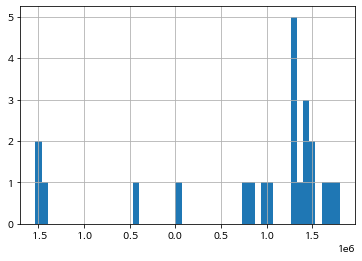

In [187]:
data_camp['transaction_amount'].hist(bins=50)

In [188]:
data_camp['transaction_amount'].min()

-1530000

In [189]:
data_camp[data_camp['transaction_amount']==data_camp['transaction_amount'].min()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
46093,1295835,478696.0,206415.0,REFUND,COMPLETED,Apache Spark을 이용한 빅데이터 분석 입문 15기,데이터사이언스,캠프,2021-08-19 10:23:06,-1530000,NaN,NaN,1530000.0,데이터분석,2021-07-30,INICIS CARD
47330,1303956,179377.0,206415.0,REFUND,COMPLETED,Apache Spark을 이용한 빅데이터 분석 입문 15기,데이터사이언스,캠프,2021-08-24 10:20:23,-1530000,NaN,NaN,1530000.0,데이터분석,2021-07-30,INICIS CARD


In [190]:
data_camp['transaction_amount'].max()

1800000

In [191]:
data_camp[data_camp['transaction_amount']==data_camp['transaction_amount'].max()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
53514,1340102,29094.0,206415.0,PAYMENT,COMPLETED,Apache Spark을 이용한 빅데이터 분석 입문 15기,데이터사이언스,캠프,2021-09-10 17:22:33,1800000,NaN,NaN,1800000.0,데이터분석,2021-07-30,PAYCO CARD


In [192]:
how = {
    'id' : np.size,
    'transaction_amount' : np.sum,
}
data_camp_temp = data_camp.groupby(['category_title', 'course_title', 'course_id', 'type']).agg(how)
data_camp_temp['money_divide_count'] = round(( (data_camp_temp['transaction_amount']) / (data_camp_temp['id'] )), 0)
data_camp_temp

id  \
category_title course_title                       course_id type          
데이터사이언스        Apache Spark을 이용한 빅데이터 분석 입문 15기   206415.0  PAYMENT  15   
                                                            REFUND    3   
부동산/금융         부동산 금융 실무 : 엑셀을 활용한 부동산 사업성 분석 16기 204149.0  PAYMENT   2   
               파이썬을 활용한 전자공시 분석 자동화 8기            203539.0  PAYMENT   1   
                                                            REFUND    1   
프로그래밍          OpenCV로 배우는 컴퓨터 비전 프로그래밍 22기       207532.0  PAYMENT   1   

                                                                     transaction_amount  \
category_title course_title                       course_id type                          
데이터사이언스        Apache Spark을 이용한 빅데이터 분석 입문 15기   206415.0  PAYMENT            20820000   
                                                            REFUND             -4500000   
부동산/금융         부동산 금융 실무 : 엑셀을 활용한 부동산 사업성 분석 16기 204149.0  PAYMENT             1054000   
               파이썬을 활용한 전자공시 분석 자동화 8기            203539.0  PAYMENT              750000   
                                                            REFUND              -402500   
프로그래밍          OpenCV로 배우는 컴퓨터 비전 프로그래밍 22기       207532.0  PAYMENT             1350000   

                                                                     money_divide_count  
category_title course_title                       course_id type                         
데이터사이언스        Apache Spark을 이용한 빅데이터 분석 입문 15기   206415.0  PAYMENT           1388000.0  
                                                            REFUND           -1500000.0  
부동산/금융         부동산 금융 실무 : 엑셀을 활용한 부동산 사업성 분석 16기 204149.0  PAYMENT            527000.0  
               파이썬을 활용한 전자공시 분석 자동화 8기            203539.0  PAYMENT            750000.0  
                                                            REFUND            -402500.0  
프로그래밍          OpenCV로 배우는 컴퓨터 비전 프로그래밍 22기       207532.0  PAYMENT           1350000.0

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


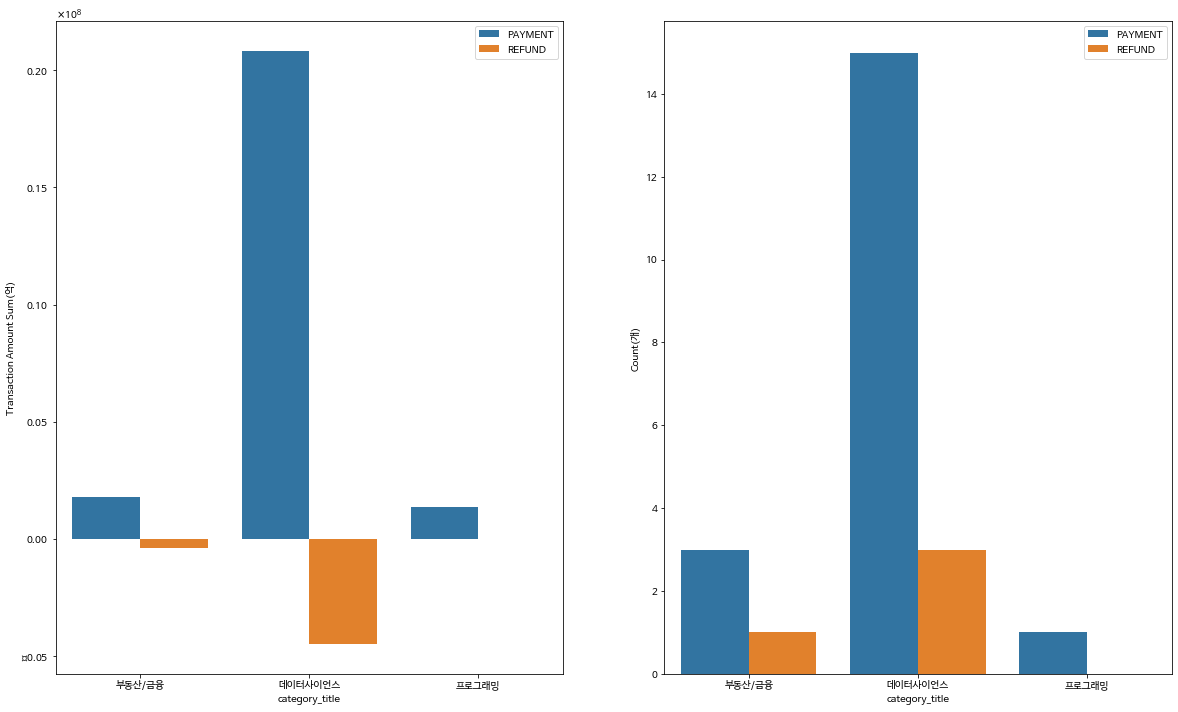

In [193]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_camp, y='transaction_amount', x='category_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_camp, y='id', x='category_title', hue='type',  ci=None, estimator=np.size)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

category_title별 수익과 거래 횟수를 확인할 수 있다. category_title이 데이터사이언스의 경우 수익과 거래 횟수가 큰 비율을 차지한다.

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


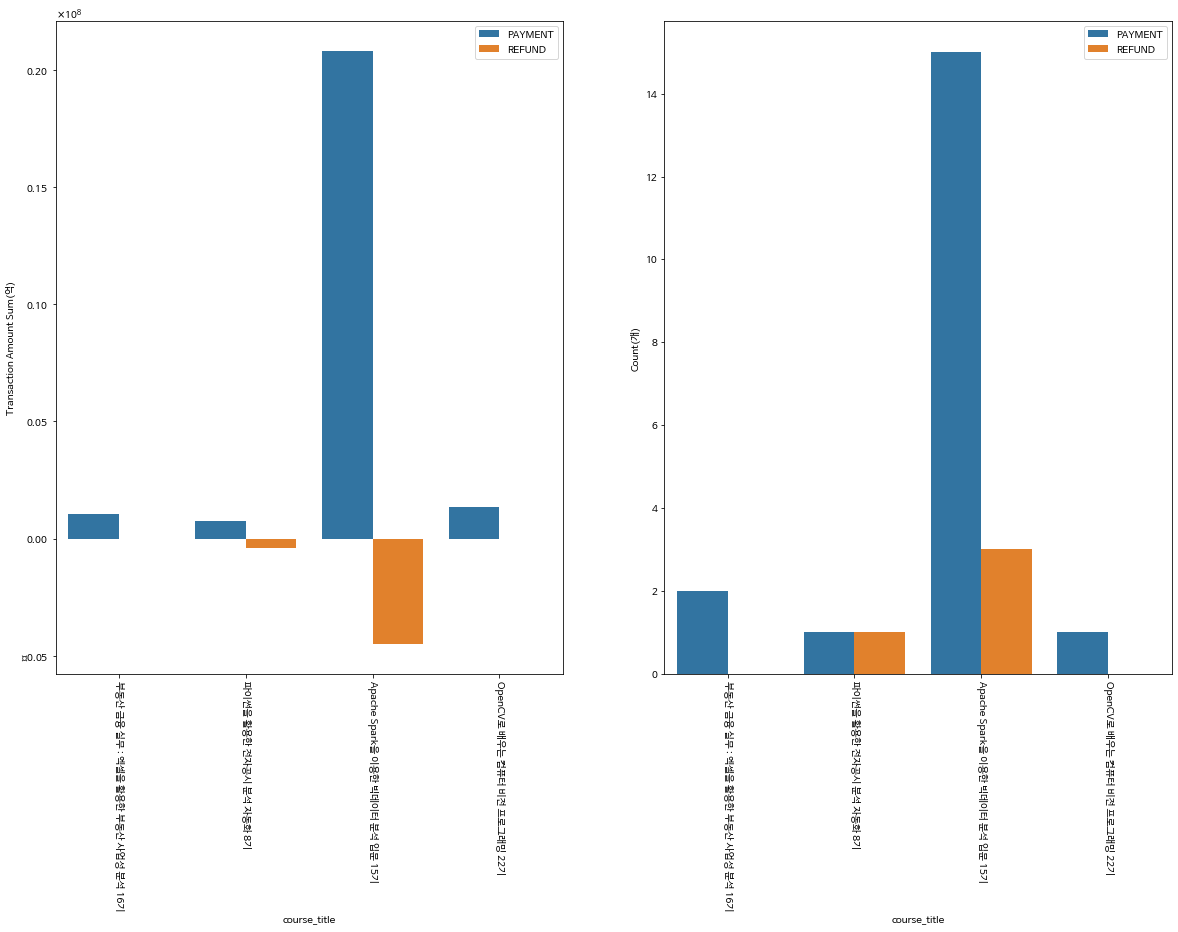

In [194]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_camp, y='transaction_amount', x='course_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_camp, y='id', x='course_title', hue='type',  ci=None, estimator=np.size)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

course_title별 수익과 거래 횟수를 확인할 수 있다. course_title이 'Apache Spark을 이용한 빅데이터 분석 입문 15기'에 해당하는 강의에서 수익과 거래 횟수가 치우쳐져 있다. 캠프 format에서 쿠폰이 사용되는 비율이 높다.

### MBA

In [195]:
data_MBA = df.copy()

In [196]:
data_MBA = data_MBA.loc[(data_MBA.format=='MBA'),:]

In [197]:
data_MBA.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
22714,1118570,16789.0,204656.0,PAYMENT,COMPLETED,경영의 신: core MBA,지식콘텐츠,MBA,2021-06-03 15:45:01,1000,NaN,NaN,1000.0,NaN,2021-06-04,KAKAO POINT
22969,1120849,552084.0,204656.0,PAYMENT,COMPLETED,경영의 신: core MBA,지식콘텐츠,MBA,2021-06-04 17:45:58,229000,NaN,NaN,229000.0,NaN,2021-06-04,INICIS CARD
23220,1122647,553223.0,204656.0,PAYMENT,COMPLETED,경영의 신: core MBA,지식콘텐츠,MBA,2021-06-06 11:01:26,229000,NaN,NaN,229000.0,NaN,2021-06-04,KAKAO CARD
23304,1123203,157869.0,204656.0,PAYMENT,COMPLETED,경영의 신: core MBA,지식콘텐츠,MBA,2021-06-06 19:38:14,229000,NaN,NaN,229000.0,NaN,2021-06-04,INICIS CARD
23490,1124345,34250.0,204656.0,PAYMENT,COMPLETED,경영의 신: core MBA,지식콘텐츠,MBA,2021-06-07 10:16:09,229000,NaN,NaN,229000.0,NaN,2021-06-04,INICIS CARD


In [198]:
data_MBA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 22714 to 50713
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      22 non-null     int64         
 1   customer_id             22 non-null     float64       
 2   course_id               22 non-null     float64       
 3   type                    22 non-null     object        
 4   state                   22 non-null     object        
 5   course_title            22 non-null     object        
 6   category_title          22 non-null     object        
 7   format                  22 non-null     object        
 8   completed_at            22 non-null     datetime64[ns]
 9   transaction_amount      22 non-null     int64         
 10  coupon_title            0 non-null      object        
 11  coupon_discount_amount  0 non-null      float64       
 12  sale_price              22 non-null     float

In [199]:
data_MBA['transaction_amount'].value_counts()

239000    16
229000     5
1000       1
Name: transaction_amount, dtype: int64

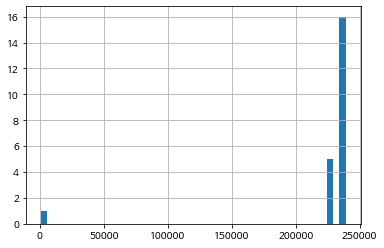

In [200]:
data_MBA['transaction_amount'].hist(bins=50)

In [201]:
data_MBA['transaction_amount'].min()

1000

In [202]:
data_MBA[data_MBA['transaction_amount']==data_MBA['transaction_amount'].min()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
22714,1118570,16789.0,204656.0,PAYMENT,COMPLETED,경영의 신: core MBA,지식콘텐츠,MBA,2021-06-03 15:45:01,1000,NaN,NaN,1000.0,NaN,2021-06-04,KAKAO POINT


In [203]:
data_MBA['transaction_amount'].max()

239000

In [204]:
data_MBA[data_MBA['transaction_amount']==data_MBA['transaction_amount'].max()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
25361,1137249,390054.0,204656.0,PAYMENT,COMPLETED,경영의 신: core MBA,지식콘텐츠,MBA,2021-06-11 23:33:54,239000,NaN,NaN,239000.0,NaN,2021-06-04,PAYCO POINT
26063,1142799,561367.0,204656.0,PAYMENT,COMPLETED,경영의 신: core MBA,지식콘텐츠,MBA,2021-06-15 09:05:01,239000,NaN,NaN,239000.0,NaN,2021-06-04,INICIS CARD
26342,1144933,88382.0,204656.0,PAYMENT,COMPLETED,경영의 신: core MBA,지식콘텐츠,MBA,2021-06-16 12:38:09,239000,NaN,NaN,239000.0,NaN,2021-06-04,INICIS CARD
26650,1147339,47260.0,204656.0,PAYMENT,COMPLETED,경영의 신: core MBA,지식콘텐츠,MBA,2021-06-17 16:36:13,239000,NaN,NaN,239000.0,NaN,2021-06-04,INICIS CARD
27028,1151052,542822.0,204656.0,PAYMENT,COMPLETED,경영의 신: core MBA,지식콘텐츠,MBA,2021-06-19 13:29:43,239000,NaN,NaN,239000.0,NaN,2021-06-04,INICIS CARD
27435,1153784,33598.0,204656.0,PAYMENT,COMPLETED,경영의 신: core MBA,지식콘텐츠,MBA,2021-06-20 22:40:16,239000,NaN,NaN,239000.0,NaN,2021-06-04,INICIS CARD
27988,1157803,50769.0,204656.0,PAYMENT,COMPLETED,경영의 신: core MBA,지식콘텐츠,MBA,2021-06-22 20:44:27,239000,NaN,NaN,239000.0,NaN,2021-06-04,INICIS CARD
29035,1168283,114937.0,204656.0,PAYMENT,COMPLETED,경영의 신: core MBA,지식콘텐츠,MBA,2021-06-26 23:15:38,239000,NaN,NaN,239000.0,NaN,2021-06-04,PAYCO CARD
29188,1169459,76253.0,204656.0,PAYMENT,COMPLETED,경영의 신: core MBA,지식콘텐츠,MBA,2021-06-27 17:26:57,239000,NaN,NaN,239000.0,NaN,2021-06-04,INICIS CARD
30710,1179527,570739.0,204656.0,PAYMENT,COMPLETED,경영의 신: core MBA,지식콘텐츠,MBA,2021-06-30 16:07:51,239000,NaN,NaN,239000.0,NaN,2021-06-04,INICIS CARD


In [205]:
how = {
    'id' : np.size,
    'transaction_amount' : np.sum,
}
data_MBA_temp = data_MBA.groupby(['category_title', 'course_title', 'course_id', 'type']).agg(how)
data_MBA_temp['money_divide_count'] = round(( (data_MBA_temp['transaction_amount']) / (data_MBA_temp['id'] )), 0)
data_MBA_temp

,,,,id,transaction_amount,money_divide_count
category_title,course_title,course_id,type,,,
지식콘텐츠,경영의 신: core MBA,204656.0,PAYMENT,22,4970000,225909.0


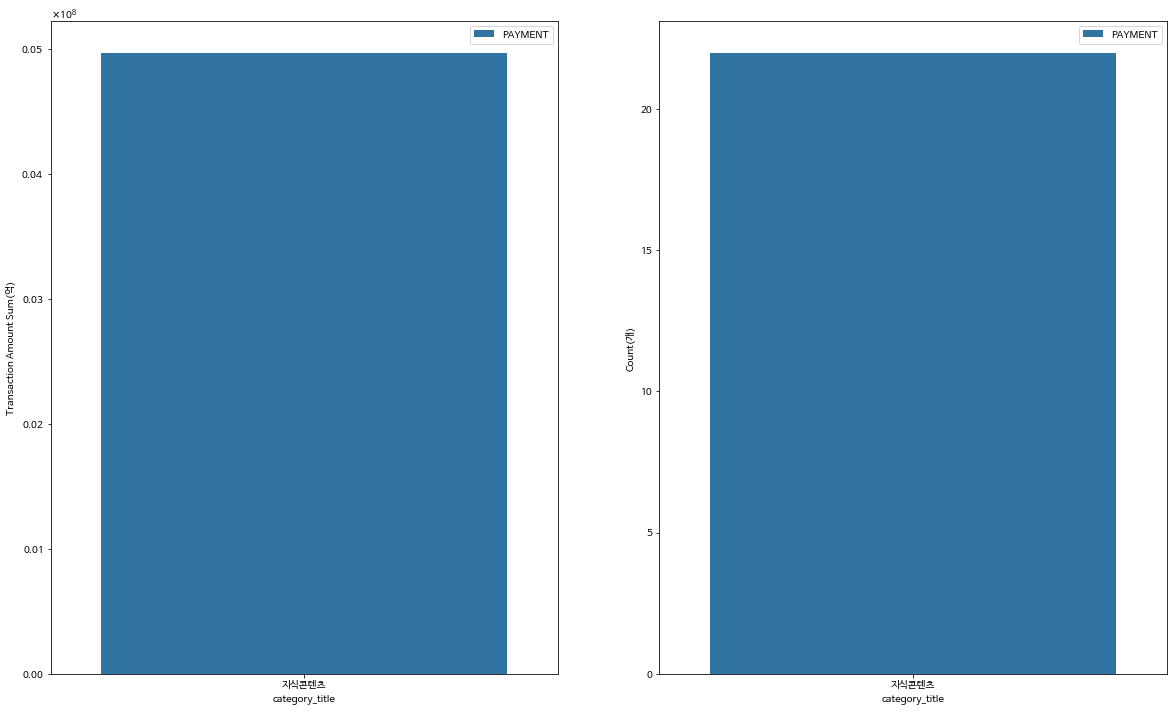

In [206]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_MBA, y='transaction_amount', x='category_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_MBA, y='id', x='category_title', hue='type',  ci=None, estimator=np.size)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

category_title별 수익과 거래 횟수를 확인할 수 있다. category_title이 지식콘텐츠 한가지만 존재한다.

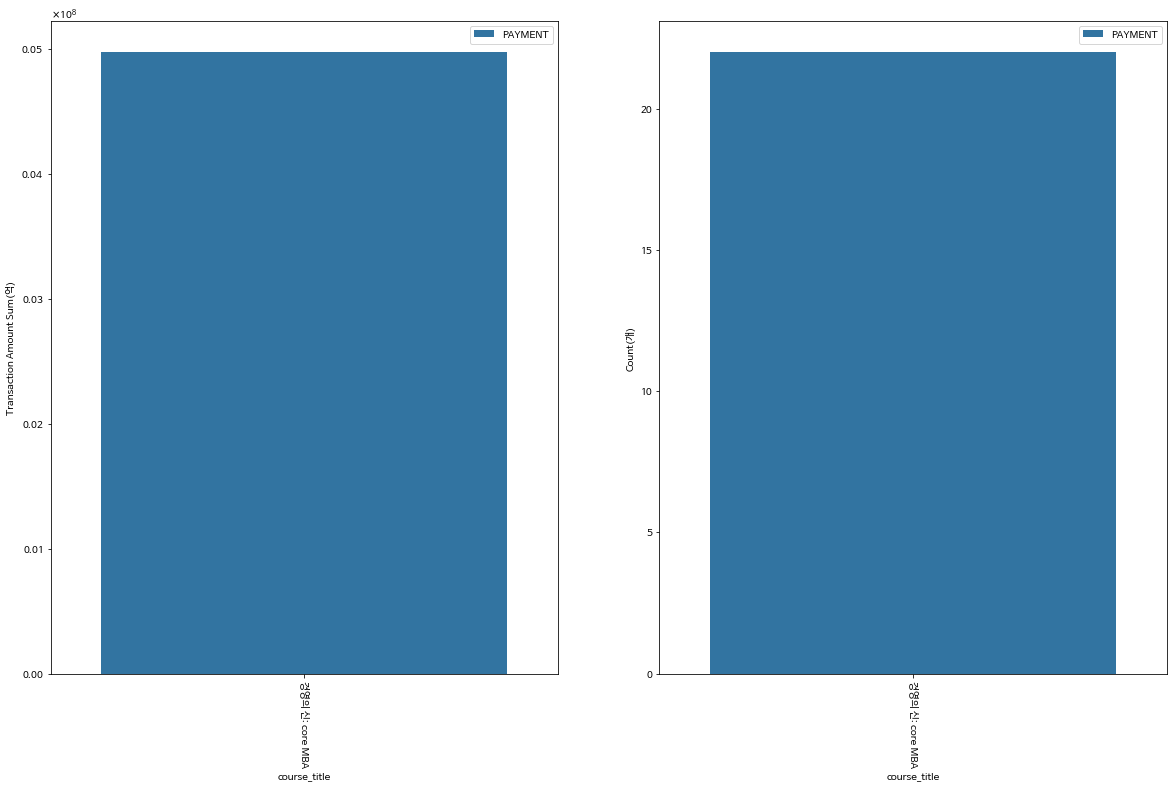

In [207]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_MBA, y='transaction_amount', x='course_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_MBA, y='id', x='course_title', hue='type',  ci=None, estimator=np.size)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

course_title별 수익과 거래 횟수를 확인할 수 있다. course_title이 한가지만 존재한다. MBA format에서 쿠폰이 사용되지 않았다.

### 관리

In [208]:
data_management = df.copy()

In [209]:
data_management = data_management.loc[(data_management.format=='관리'),:]

In [210]:
data_management.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
15365,1067142,496508.0,205233.0,PAYMENT,COMPLETED,(TEST) 오프라인 과세 상품 결제 테스트용 상품,관리,관리,2021-05-12 17:31:06,150000,NaN,NaN,150000.0,NaN,NaT,NAVER TRANS


In [211]:
data_management.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 15365 to 15365
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      1 non-null      int64         
 1   customer_id             1 non-null      float64       
 2   course_id               1 non-null      float64       
 3   type                    1 non-null      object        
 4   state                   1 non-null      object        
 5   course_title            1 non-null      object        
 6   category_title          1 non-null      object        
 7   format                  1 non-null      object        
 8   completed_at            1 non-null      datetime64[ns]
 9   transaction_amount      1 non-null      int64         
 10  coupon_title            0 non-null      object        
 11  coupon_discount_amount  0 non-null      float64       
 12  sale_price              1 non-null      float6

In [212]:
data_management['transaction_amount'].value_counts()

150000    1
Name: transaction_amount, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


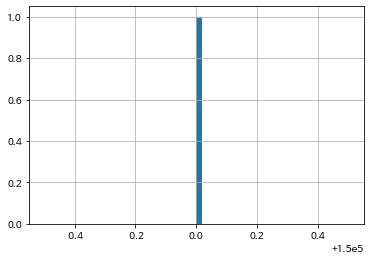

In [213]:
data_management['transaction_amount'].hist(bins=50)

In [215]:
how = {
    'id' : np.size,
    'transaction_amount' : np.sum,
}
data_management_temp = data_management.groupby(['category_title', 'course_title', 'course_id', 'type']).agg(how)
data_management_temp['money_divide_count'] = round(( (data_management_temp['transaction_amount']) / (data_management_temp['id'] )), 0)
data_management_temp

,,,,id,transaction_amount,money_divide_count
category_title,course_title,course_id,type,,,
관리,(TEST) 오프라인 과세 상품 결제 테스트용 상품,205233.0,PAYMENT,1,150000,150000.0


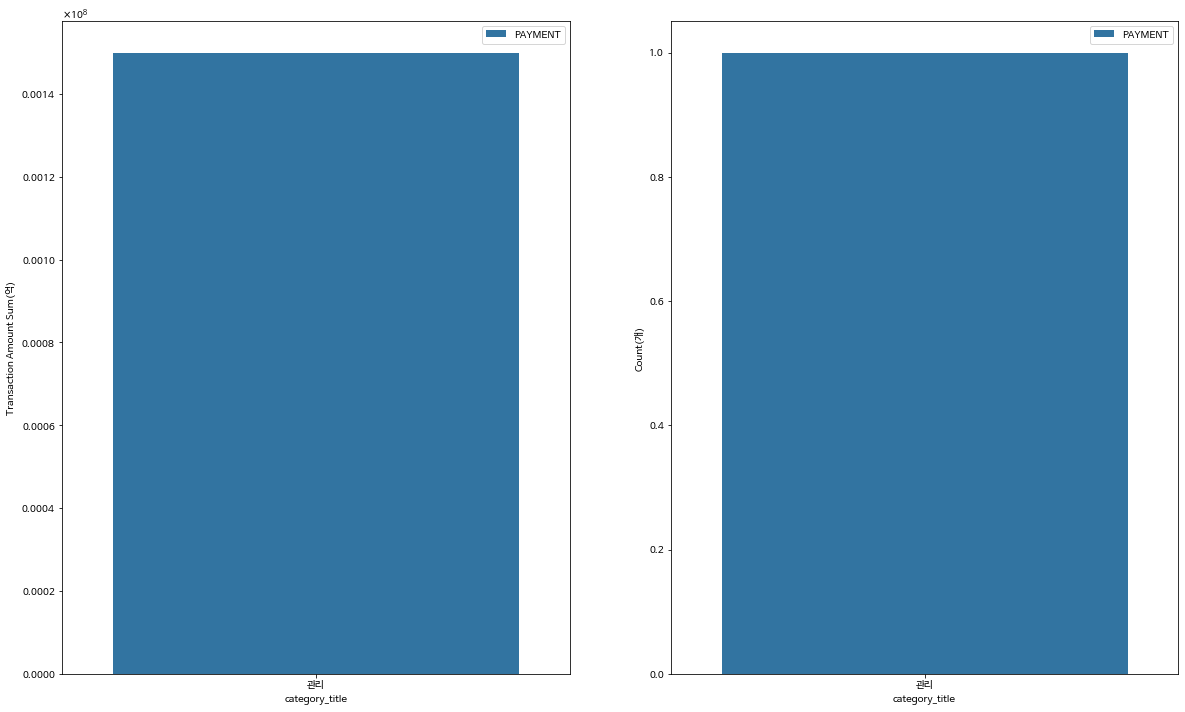

In [216]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_management, y='transaction_amount', x='category_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_management, y='id', x='category_title', hue='type',  ci=None, estimator=np.size)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

관리에 해당하는 format 데이터가 한가지만 존재한다.

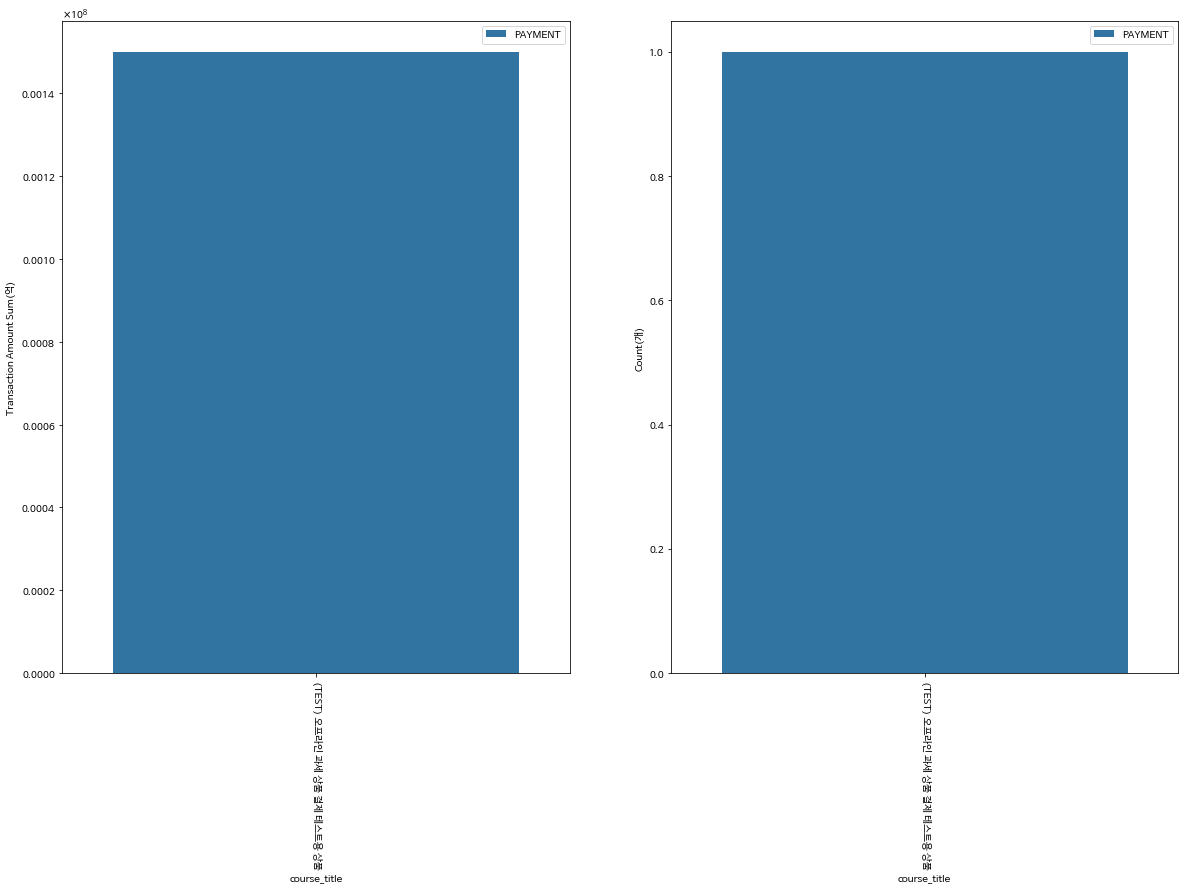

In [217]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data_management, y='transaction_amount', x='course_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data_management, y='id', x='course_title', hue='type',  ci=None, estimator=np.size)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

관리에 해당하는 format 데이터가 한가지만 존재한다.

### 온라인

In [218]:
data_online = df.copy()

In [219]:
data_online = data_online.loc[(data_online.format=='온라인'),:]

In [220]:
data_online.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
19888,1078156,62566.0,NaN,REFUND,COMPLETED,프로모션 : 자유이용권 (3월),NaN,온라인,2021-05-26 22:06:00,-199000,NaN,NaN,199000.0,NaN,NaT,PG TRANSFER


온라인에 해당하는 format 데이터는 강의가 아닌 자유이용권 티켓이다.

--------------------------------------------------------------------

## 데이터 전처리

##모델링

## 결과 보고서 작성